# Lending Club Case Study

## Problem Statement


This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [39]:
# Analysis Steps
# 1. Understanding the Data
# 2. Cleaning the Data
# 3. Imputing Missing Values
# 4. Detecting Outliers
# 5. Conducting Univariate Analysis
# 6. Conducting Bivariate Analysis

### Step 1 - Data Understanding

In [41]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing warnings to suppress warning messages
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Setting display options to control output display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
#pd.describe_option('display.width')
#pd.reset_option()

In [43]:
# loading loan data 
loan = pd.read_csv("loan.csv")

In [44]:
# checking top 5 rows of data set
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [45]:
#Checking initial Number of Rows and Columns in data
print("Number of Rows:", loan.shape[0])
print("Number of Columns:", loan.shape[1])

Number of Rows: 39717
Number of Columns: 111


In [46]:
#Checking info on data 
loan.info()
#Observation data is of mixed data type Float , int and Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [47]:
#Describing data to understand basic statistical values 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [48]:
#Checking for Duplicate in data
loan[loan.duplicated() == True]

#There are no duplicate values found in data set

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [49]:
#Checking for % of null values in columns
print(((loan.isna().sum()/loan.shape[0])*100).sort_values(ascending=False))

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

### Data Observation Summary
- The initial dataset comprises 39,717 rows and 111 columns.
- The data includes a mix of types: integers, floats, and objects.
- There are no duplicate rows in the dataset.
- Several columns consist solely of null values.

## Step 2 - Data Cleaning

In [62]:
# There are column with all null values, this columns are not usefull to us removing them from data set
loan = loan.loc[:,loan.isna().sum()/loan.shape[0]*100 != 100]

In [63]:
#Checking Shape after droping cloumn with all null values
loan.shape

# We are left with 57 columns in data set 

(39717, 57)

In [64]:
#Checking % of null values again in columns
print(((loan.isna().sum()/loan.shape[0])*100).sort_values(ascending=False))

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


In [65]:
# Dropping columns that have more than 60% of null values ('next_pymnt_d','mths_since_last_record','mths_since_last_delinq')
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'] , axis=1,inplace = True)

In [66]:
print(((loan.isna().sum()/loan.shape[0])*100).sort_values(ascending=False))
print(loan.shape)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


In [67]:
# We are left with 54 column after dropping column which had large number of null values

In [68]:
# Checking unique values per column
loan.nunique().sort_values(ascending= False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
desc                          26526
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d          

In [69]:
# there are column that have only 1 unique values dropping them from data set as they are not useful ('pymnt_plan','initial_list_status'
# ,'collections_12_mths_ex_med','policy_code','application_type','chargeoff_within_12_mths''acc_now_delinq','delinq_amnt','tax_liens' )

loan.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','chargeoff_within_12_mths'
          ,'acc_now_delinq','delinq_amnt','tax_liens'] , axis=1,inplace=True)

In [70]:
# Droppig Below columns 
# URL and id column as they are not usefull and have all unqiue values
# The 'title' and 'emp title' fields contain too many unique values to be useful for analysis purposes.
# Zip_code as we already location and its masked and desc as it has free flowing text values 
loan.drop(['url','member_id','zip_code','desc','title','emp_title'] , axis=1,inplace=True)

In [71]:
#Checking shape of data again
loan.shape

#We have 39 columns in data set now

(39717, 39)

In [72]:
# Checking datatype for each column
loan.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [73]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [74]:
# There are column with similar name and serves similar purpose , comparing data in them and keeping only one of them 
# out_prncp & out_prncp_inv
# total_pymnt & total_pymnt_inv
# loan_amnt & funded_amnt & funded_amnt_inv

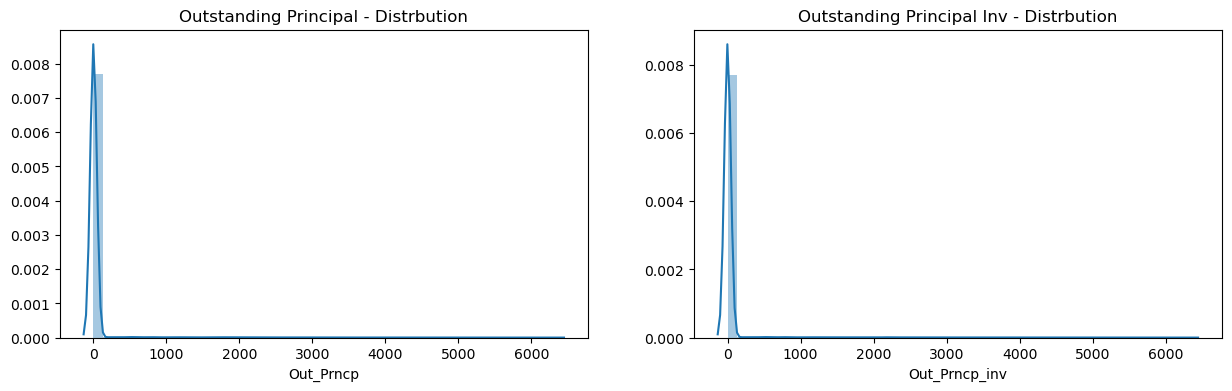

In [75]:
#Checking Distribution of out_prncp & out_prncp_inv
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15, 4))
#plt.subplots_adjust(left=0.1,bottom=0.1, right=0.8, top=0.5, wspace=0.3, hspace=0.3)

#Suplot 1 - Out_prncp
plt.subplot(121)
sns.distplot(loan,x=loan.out_prncp)
plt.title("Outstanding Principal - Distrbution")
plt.xlabel("Out_Prncp")
plt.ylabel('')

#Suplot 2 - Out_prncp_inv
plt.subplot(122)
sns.distplot(loan,x=loan.out_prncp_inv)
plt.title("Outstanding Principal Inv - Distrbution")
plt.xlabel("Out_Prncp_inv")
plt.ylabel('')
plt.show()

# Observation Out_prncp and Out_prncp_inv follow same distribution curve

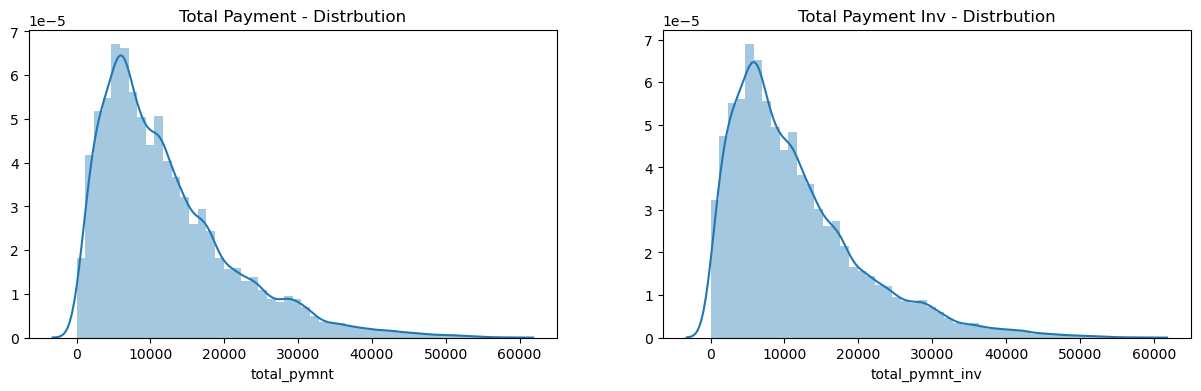

In [76]:
#checking Distribution of total_pymnt & total_pymnt_inv
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15, 4))
#plt.subplots_adjust(left=0.1,bottom=0.1, right=0.8, top=0.5, wspace=0.3, hspace=0.3)

#Suplot 1 - total_pymnt
plt.subplot(121)
sns.distplot(loan,x=loan.total_pymnt)
plt.title("Total Payment - Distrbution")
plt.xlabel("total_pymnt")
plt.ylabel('')

#Suplot 2 - total_pymnt_inv
plt.subplot(122)
sns.distplot(loan,x=loan.total_pymnt_inv)
plt.title("Total Payment Inv - Distrbution")
plt.xlabel("total_pymnt_inv")
plt.ylabel('')
plt.show()

# Observation total_pymnt and total_pymnt_inv follow same distribution curve

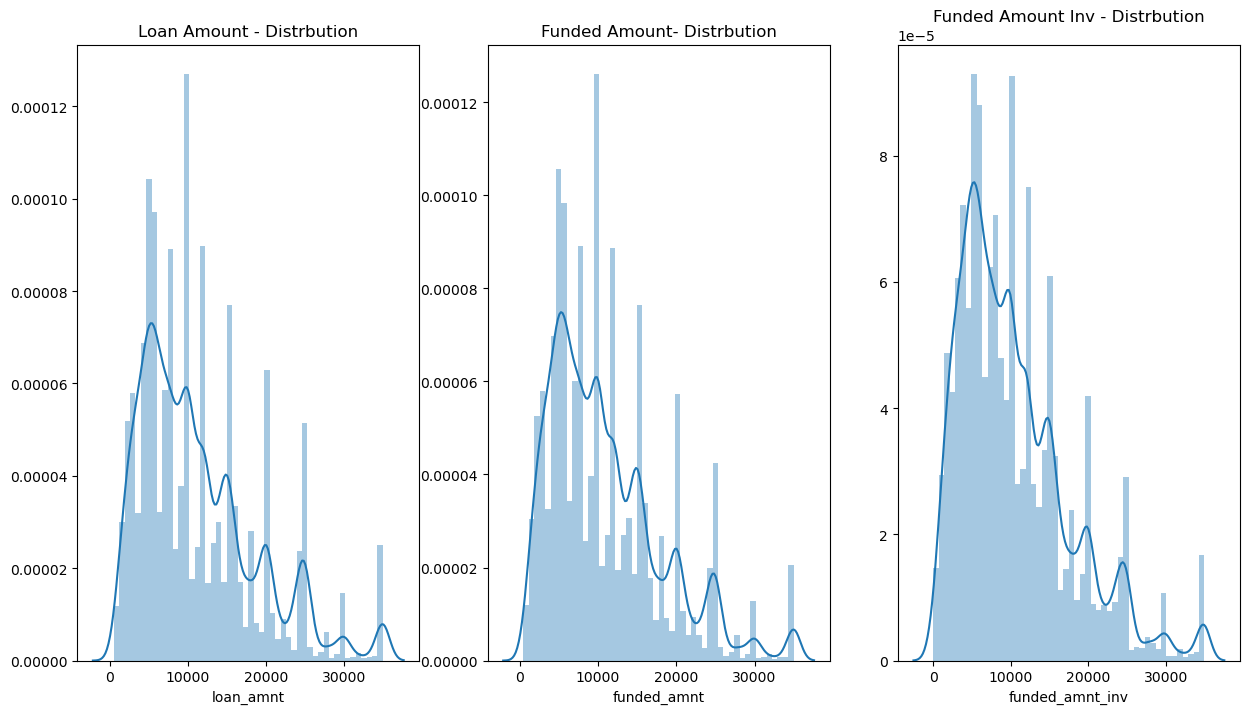

In [77]:
#checking Distribution ofloan_amnt & funded_amnt & funded_amnt_inv
fig, axes = plt.subplots(nrows=1, ncols=3 , figsize=(15, 8))
#plt.subplots_adjust(left=0.1,bottom=0.1, right=0.8, top=0.5, wspace=0.3, hspace=0.3)

#Suplot 1 - loan_amnt
plt.subplot(131)
sns.distplot(loan,x=loan.loan_amnt)
plt.title("Loan Amount - Distrbution")
plt.xlabel("loan_amnt")
plt.ylabel('')

#Suplot 2 - funded_amnt
plt.subplot(132)
sns.distplot(loan,x=loan.funded_amnt)
plt.title("Funded Amount- Distrbution")
plt.xlabel("funded_amnt")
plt.ylabel('')

#Suplot 2 - funded_amnt_inv
plt.subplot(133)
sns.distplot(loan,x=loan.funded_amnt_inv)
plt.title("Funded Amount Inv - Distrbution")
plt.xlabel("funded_amnt_inv")
plt.ylabel('')
plt.show()

# Observation loan_amnt,funded_amnt and funded_amnt_inv follow same distribution curve

In [78]:
# After checking distibution of columns we observed below 
# out_prncp_inv and out_prncp have same distribution we can keep only one column in our data
# total_pymnt_inv and total_pymnt have same distribution we can keep only one column in our data
# funded_amnt_inv, funded_amnt and loan_amnt have same distribution we can keep only one column in our data 
# We can also drop total_rec_prncp, total_rec_int,total_rec_late_fee ,collection_recovery_fee column as we already have recoveries column

In [79]:
# Droppig'out_prncp_inv','total_pymnt_inv','funded_amnt','funded_amnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee'

loan.drop(['out_prncp_inv','total_pymnt_inv','funded_amnt','funded_amnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
           ,'collection_recovery_fee'],axis=1,inplace=True)

In [80]:
loan.shape

# we are left with 31 column now

(39717, 31)

In [81]:
## Removing this column based on domain understanding, they are not useful for analysis we are performing
# ('delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','total_acc','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d')

loan=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','total_acc','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)

In [82]:
loan.shape
# we are left with 23 column now

(39717, 23)

In [83]:
#Cleaning int_rate and revolv_until column as they have %values and their data type is object

loan.int_rate=loan.int_rate.apply(lambda x:str(x).replace('%','')).astype('float')
loan.revol_util=loan.revol_util.apply(lambda x:str(x).replace('%','')).astype('float')

In [84]:
# Deriving column for month and Year from issue_date column
loan.issue_d = pd.to_datetime(loan.issue_d,format='%b-%y')
loan['Issue_Year'] = loan.issue_d.dt.year
loan['Issue_Month'] = loan.issue_d.dt.month

In [85]:
# Dropping Issue Date as we have month and year now
loan.drop(['issue_d'],axis=1,inplace= True)

In [86]:
loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [87]:
# Keeping only loan with status "Fully Paid" and "Charged Off" for further analysis 
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(38577, 24)

### Data Cleaning Summary
- We have dropped the column that had more than 60% null values.
- We have removed the column which had only one unique value.
- We have removed the column which had too many unique value.
- We have compared columns with similar purposes and retained only one.
- We have dropped column based on domain understanding
- We have corrected the format for the column.
- We have derived columns for Year and Month.
- We have kept data only for loan with status ('Fully Paid','Charged Off')

## Step 3 - Handling Missing values

In [114]:
#Checking count of Null values in columns
loan.isnull().sum().sort_values()

id                         0
recoveries                 0
total_pymnt                0
out_prncp                  0
revol_bal                  0
pub_rec                    0
dti                        0
addr_state                 0
purpose                    0
Issue_Year                 0
loan_status                0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
loan_amnt                  0
verification_status        0
Issue_Month                0
revol_util                50
pub_rec_bankruptcies     697
emp_length              1033
dtype: int64

In [115]:
#checking value count for pub_rec_bankruptcies
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [116]:
# replacing 0 for missing values in pub_rec_bankruptcies as its most occuring value
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [117]:
# describing revol_util column
loan.revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [118]:
round(loan.revol_util.mean(),2)

48.7

In [119]:
#replacing null with mean for revol_util
loan.revol_util.fillna(round(loan.revol_util.mean(),2),inplace=True)

In [120]:
# checking emp_length column
loan.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [121]:
loan.shape

(38577, 24)

In [122]:
# loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [123]:
loan.shape

(37544, 24)

In [124]:
# The columns 'emp_length' contain text data specific to the customer and should not have values imputed for them.
# Rows with null values in 'emp_length' will be dropped.

In [125]:
loan.isnull().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec                 0
revol_bal               0
revol_util              0
out_prncp               0
total_pymnt             0
recoveries              0
pub_rec_bankruptcies    0
Issue_Year              0
Issue_Month             0
dtype: int64

In [126]:
loan.shape

(37544, 24)

In [127]:
loan.dtypes.sort_index(ascending=False)

verification_status      object
total_pymnt             float64
term                     object
sub_grade                object
revol_util              float64
revol_bal                 int64
recoveries              float64
purpose                  object
pub_rec_bankruptcies    float64
pub_rec                   int64
out_prncp               float64
loan_status              object
loan_amnt                 int64
int_rate                float64
installment             float64
id                        int64
home_ownership           object
grade                    object
emp_length               object
dti                     float64
annual_inc              float64
addr_state               object
Issue_Year                int32
Issue_Month               int32
dtype: object

In [128]:
# Data Does not have null values now, categroizing column for further analysis 

In [129]:
cat_cols = ['addr_state','emp_length','grade','home_ownership','purpose','sub_grade','term','verification_status']
cont_cols =['annual_inc','dti','installment','int_rate','Issue_Year','Issue_Month ','loan_amnt','out_prncp','pub_rec','pub_rec_bankruptcies','recoveries'
            ,'revol_bal','revol_util','total_pymnt']
id_cols=['id']
result_cols=['loan_status']

### Missing values Summary
- Some columns had missing values that required attention.
- We have imputed the most occurring value for 'pub_rec_bankruptcies'.
- We have imputed the mean for 'revol_util'.
- For all other columns with null values, we have chosen to drop the rows as they were person-specific columns.

## Step 4 - Outlier Detection

In [147]:
# Checking for outliers in the columns: annual_inc, dti, installment, int_rate, loan_amnt, out_prncp, recoveries, revol_bal, revol_util, and total_pymnt.
# The columns 'pub_rec' and 'pub_rec_bankruptcies' have only a few unique values, hence they are not included.
# The columns 'Issue_Month' and 'Issue_Year' are derived columns.

In [148]:
cont_cols

['annual_inc',
 'dti',
 'installment',
 'int_rate',
 'Issue_Year',
 'Issue_Month ',
 'loan_amnt',
 'out_prncp',
 'pub_rec',
 'pub_rec_bankruptcies',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_pymnt']

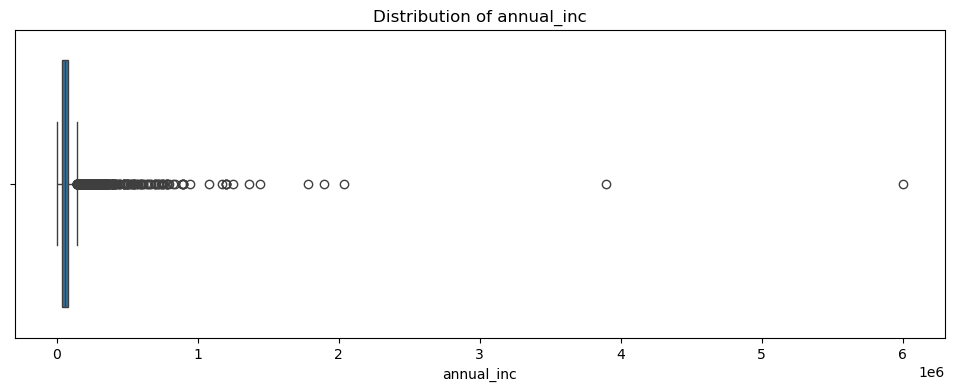

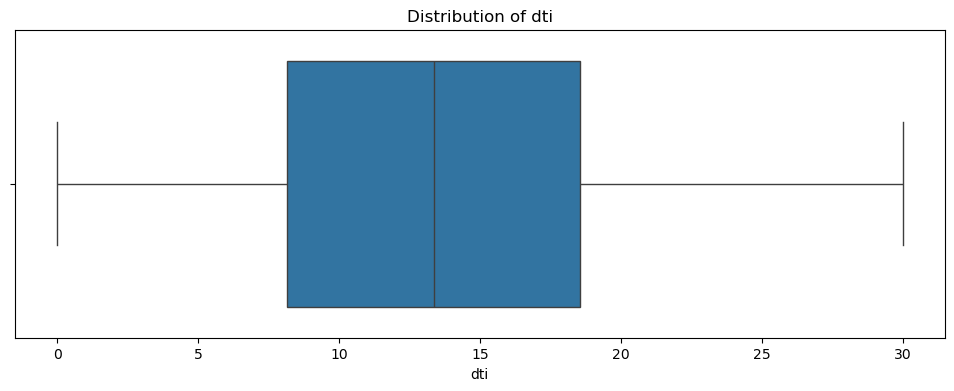

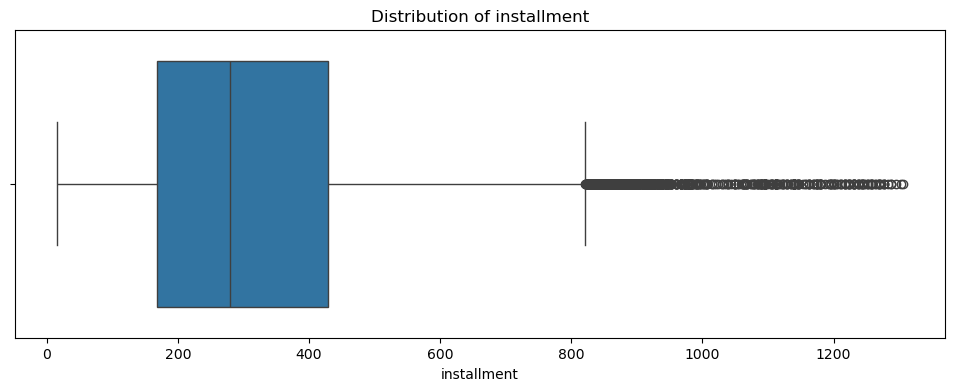

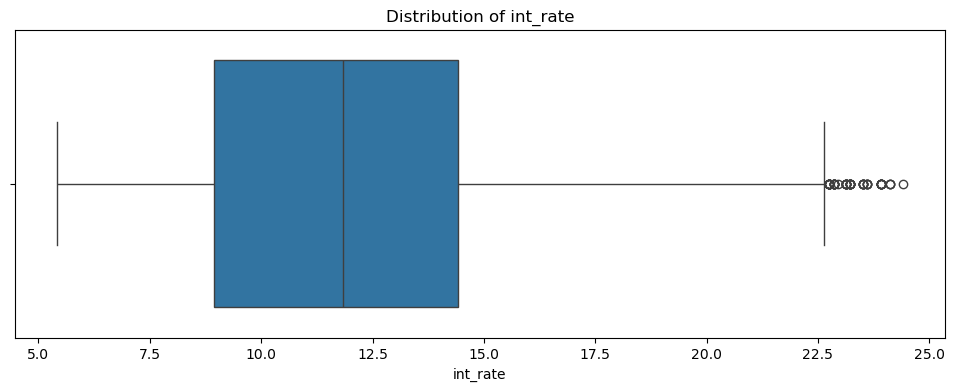

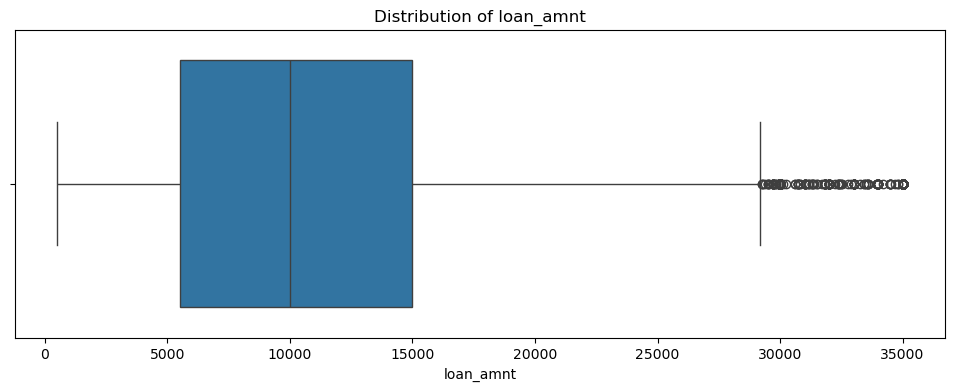

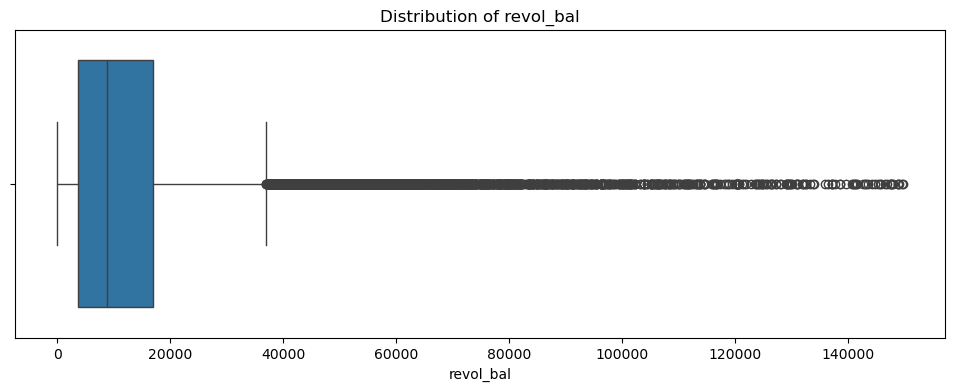

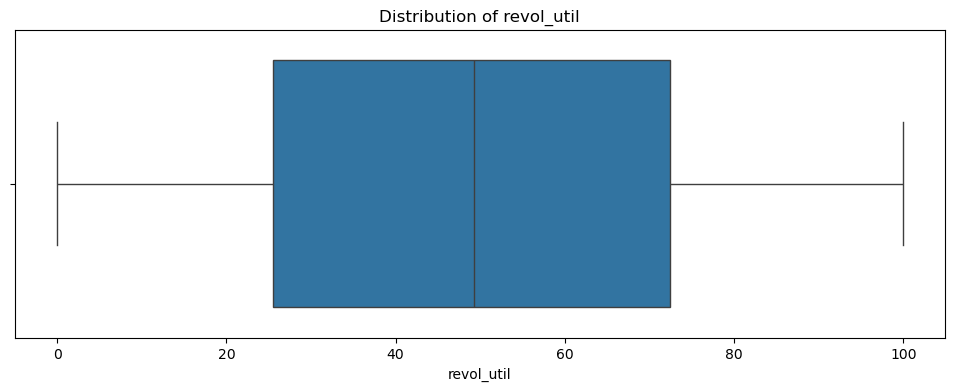

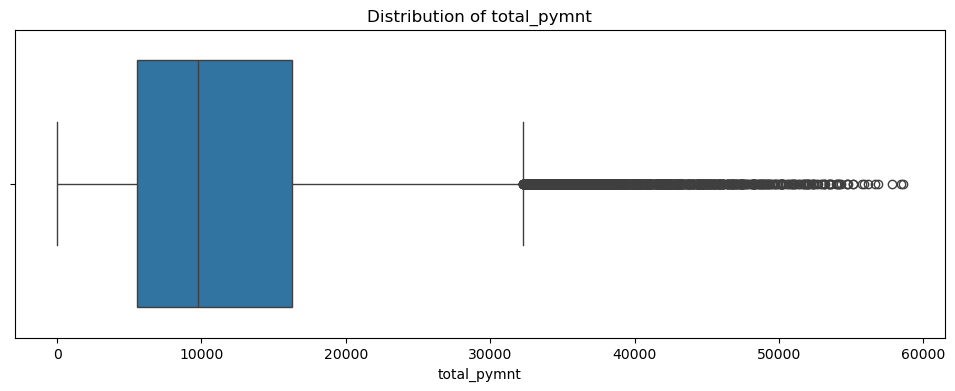

In [149]:
# Updating the column list to perform outlier detection on relevant columns; we are not conducting outlier analysis for 'pub_rec', 'pub_rec_bankruptcies', 'Issue_Year', and 'Issue_Month' as they have very few distinct values.

Cols_List_Outliers =['annual_inc','dti','installment','int_rate','loan_amnt','revol_bal','revol_util','total_pymnt']

for var in Cols_List_Outliers:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=loan,x=var)
    #Title = "Distribution of",var
    plt.title("Distribution of " + var)
    plt.xlabel(var)
    #sns.boxplot(data=loan, x=var, y='loan_status')
    plt.show()

#Observation: Outliers are present in the 'Annual Income' and 'Revolving Balance' columns, while for the remaining columns, the difference between the upper fence and the maximum value is minimal.

In [153]:
# Checking quantiles of Annual Income
loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])

0.50      60000.0
0.75      83000.0
0.90     116672.4
0.95     142000.0
0.97     166213.0
0.98     189996.0
0.99     235000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [154]:
## Observation: There are outliers in the annual income data, with most values falling below the 99th percentile.
# Therefore, filtering the data to include only annual income values less than the 99th percentile will remove outliers.
loan = loan[loan.annual_inc<=np.percentile(loan.annual_inc,99)]

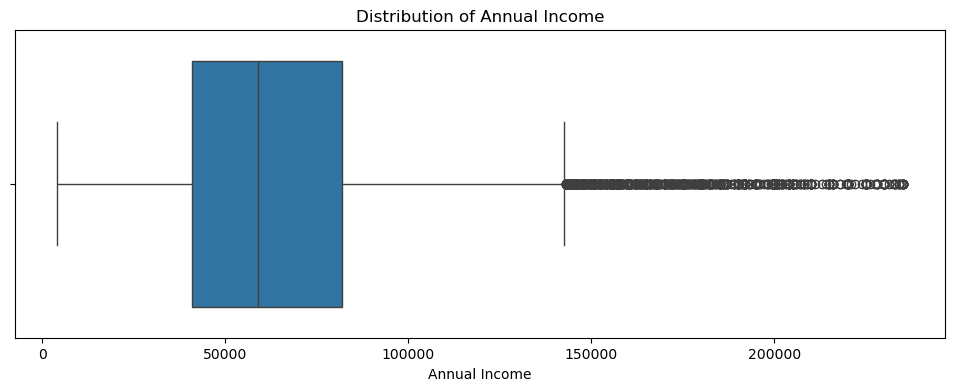

In [155]:
#checking for Annual Income again

plt.figure(figsize=(12,4))
sns.boxplot(data=loan,x=loan.annual_inc,)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
#ticks = np.arange(0, 6000000, 1000000)
#labels = ["{}M".format(i//1000000) for i in ticks]
#plt.xticks(ticks, labels)

plt.show()
# Data is clean now

In [157]:
## Observation: There are outliers in the revol_bal data, with most values falling below the 99th percentile.
# Therefore, filtering the data to include only annual income values less than the 99th percentile will remove outliers.
loan= loan[loan.revol_bal < np.percentile(loan.revol_bal,99)]

In [156]:
#checking percentiles for revol_bal
loan.revol_bal.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])

0.50      8798.00
0.75     16854.00
0.90     28622.20
0.95     40546.40
0.97     51571.92
0.98     61676.00
0.99     79997.96
1.00    149588.00
Name: revol_bal, dtype: float64

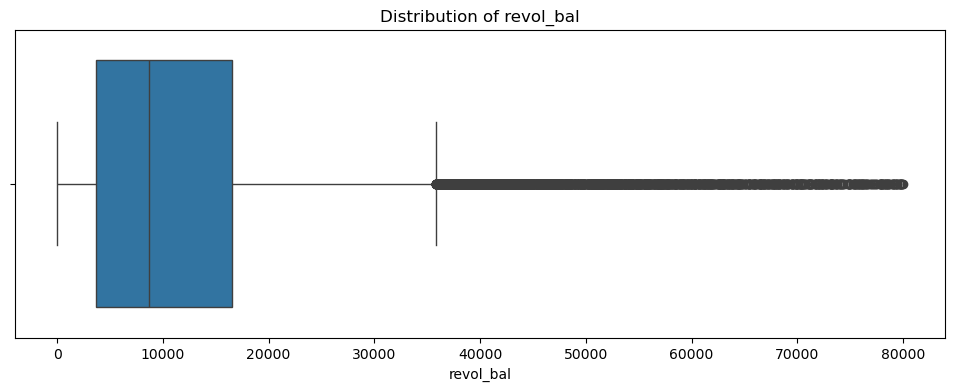

count    36801.000000
mean     12241.265971
std      12451.162291
min          0.000000
25%       3629.000000
50%       8681.000000
75%      16491.000000
max      79947.000000
Name: revol_bal, dtype: float64


In [158]:
# Checking distribution for revol_bal again 
plt.figure(figsize=(12,4))
sns.boxplot(data=loan,x=loan.revol_bal)
plt.title("Distribution of revol_bal")
plt.xlabel("revol_bal")
plt.show()
print(loan.revol_bal.describe())

#data is clean now

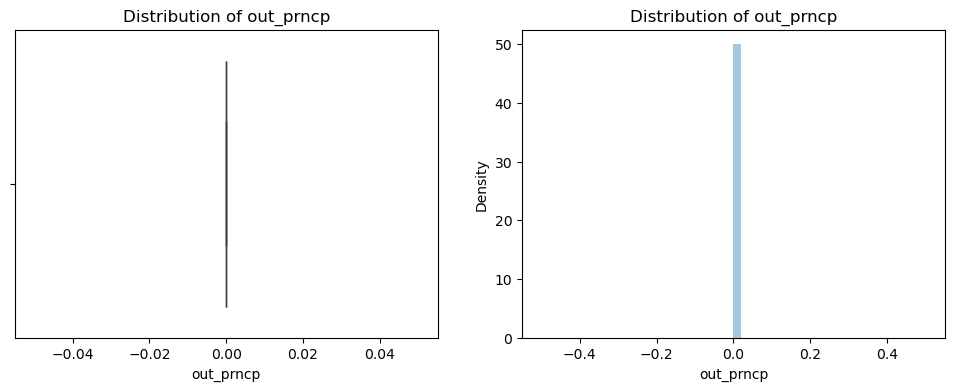

count    37544.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64


In [150]:
#Checking for out_prncp column

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(data=loan,x=loan.out_prncp)
plt.title("Distribution of out_prncp")
plt.xlabel("out_prncp")

plt.subplot(1,2,2)
sns.distplot(loan.out_prncp)
plt.title("Distribution of out_prncp")
plt.xlabel("out_prncp")


plt.show()
print(loan.out_prncp.describe())

#Observation: The majority of the values in this column are 0, and the 75th percentile is also 0, indicating that this column is not useful and should be dropped.

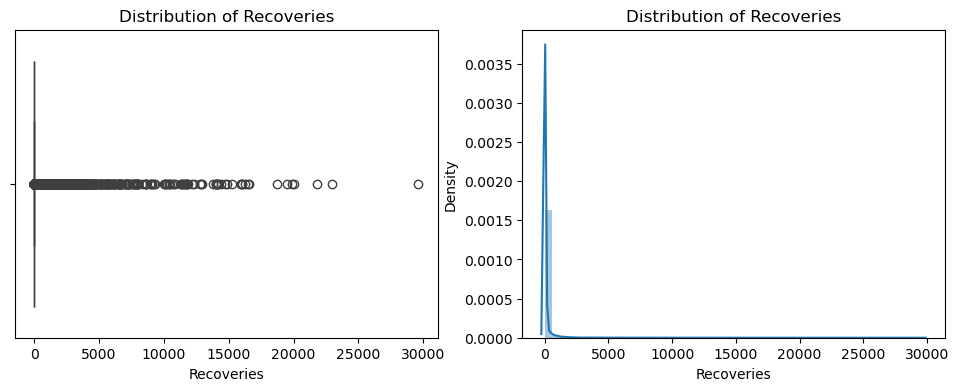

count    37544.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64


In [151]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=loan,x=loan.recoveries)
plt.title("Distribution of Recoveries")
plt.xlabel("Recoveries")

plt.subplot(1,2,2)
sns.distplot(loan.recoveries)
plt.title("Distribution of Recoveries")
plt.xlabel("Recoveries")

plt.show()
print(loan.out_prncp.describe())
#Observation: The majority of the values in this column are 0, and the 75th percentile is also 0, indicating that this column is not useful and should be dropped.

In [152]:
# Dropping 'out_prncp','recoveries' from data
loan.drop(['out_prncp','recoveries'],axis=1,inplace=True)

In [159]:
loan.shape

#We have 22 columns in data now

(36801, 22)

In [160]:
#Updating column groupin (removing 'out_prncp','recoveries' from cont_cols)
cat_cols = ['addr_state','emp_length','grade','home_ownership','loan_status','purpose','sub_grade','term','verification_status']
cont_cols =['annual_inc','dti','installment','int_rate','Issue_Month','Issue_Year','loan_amnt','pub_rec','pub_rec_bankruptcies'
            ,'revol_bal','revol_util','total_pymnt']

id_cols=['id']
result_cols=['loan_status']

### Outlier Detection Summary

- The annual income column had outliers which we have addressed by filtering data below the 99th percentile.
- The revolving balance column had outliers which we have addressed by filtering data below the 99th percentile.
- We are dropping the 'Recoveries' and 'out_prcn' columns as most of the values are zero.
- There are no outliers in any other continuous columns.

## Step 5 - Univariate Analysis

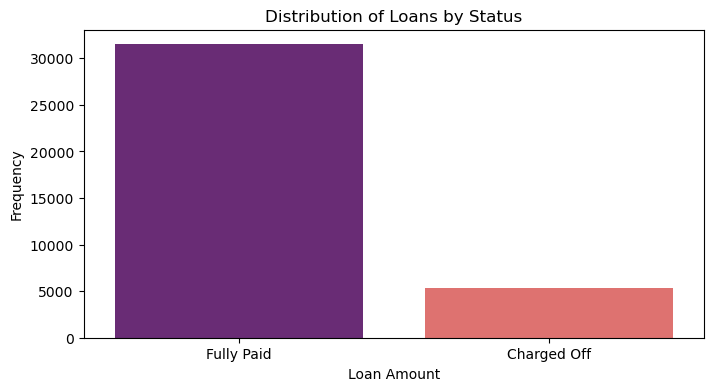

In [176]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.loan_status,palette="magma")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Status")
plt.show()

#Observation Default loan's are comparativley low compared to fully paid loan's

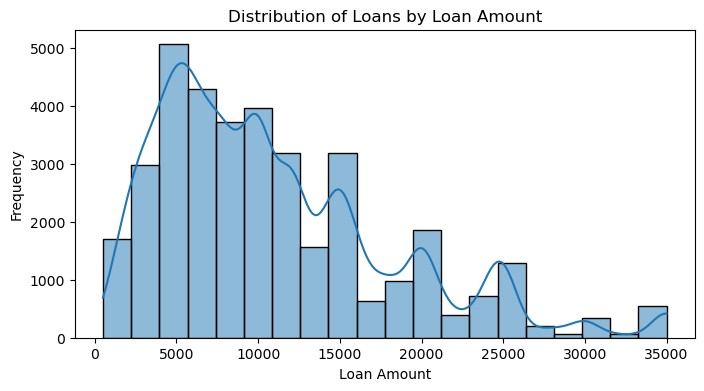

count    36801.000000
mean     10984.063612
std       7237.100379
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [177]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.loan_amnt,kde=True,bins=20)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Loan Amount")
plt.show()

loan.loan_amnt.describe()

#Observation: Loan amounts range from 500 to 35,000, with a peak at around 10,000 before it begins to decline. 
# Most loans fall within the 5,000-15,000 bracket, with an average of approximately 11,000.

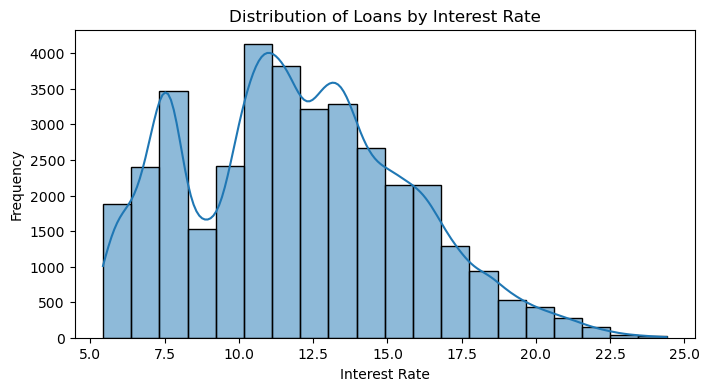

count    36801.000000
mean        11.947173
std          3.673326
min          5.420000
25%          8.940000
50%         11.830000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [178]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.int_rate,kde=True,bins=20)
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Interest Rate")
plt.show()

loan.int_rate.describe()

#Observation Typical Interest rate of loans lies in range of bucket 5 to 7.5 and then from 10 to 15

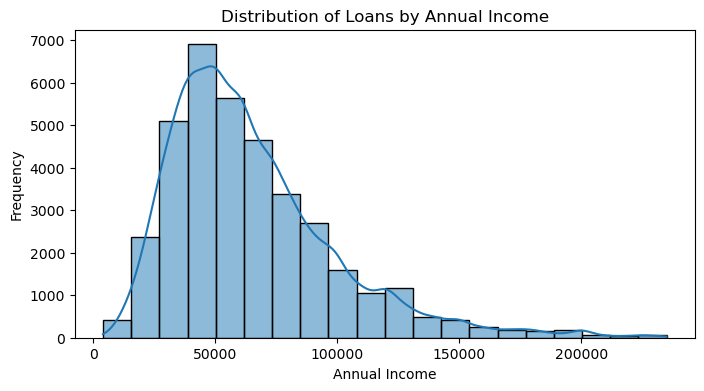

count     36801.000000
mean      65239.377834
std       34451.852846
min        4000.000000
25%       40500.000000
50%       58000.000000
75%       80000.000000
max      235000.000000
Name: annual_inc, dtype: float64

In [179]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.annual_inc,kde=True,bins=20)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Annual Income")
plt.show()

loan.annual_inc.describe()

# Observation: The majority of loans are from individuals within the low income range of less than 60,000.

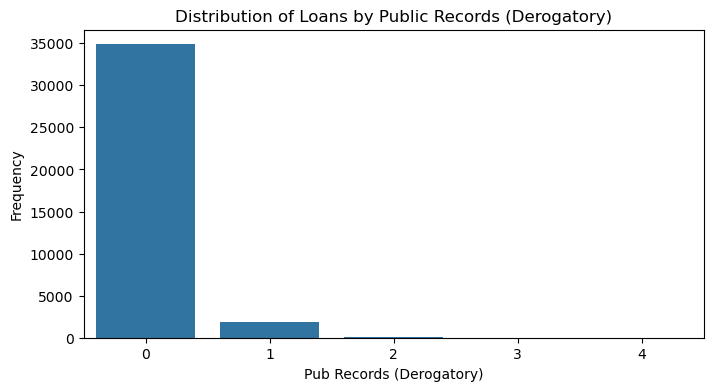

In [180]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.pub_rec)
plt.xlabel("Pub Records (Derogatory)")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Public Records (Derogatory)")
plt.show()

# Observation: The majority of borrowers do not have public records of derogatory.

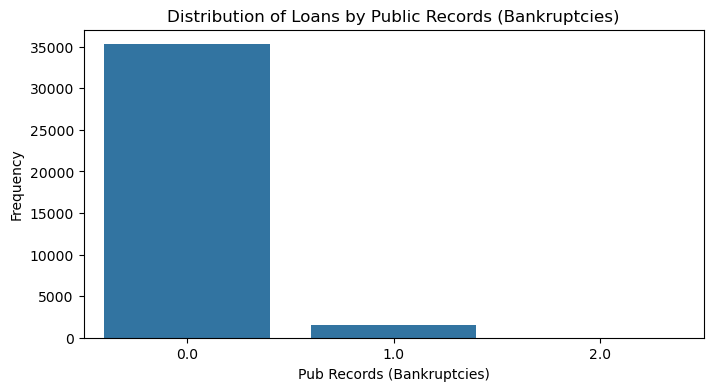

In [181]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.pub_rec_bankruptcies)
plt.xlabel("Pub Records (Bankruptcies)")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Public Records (Bankruptcies)")
plt.show()

# Observation: The majority of borrowers do not have public records of bankruptcies.

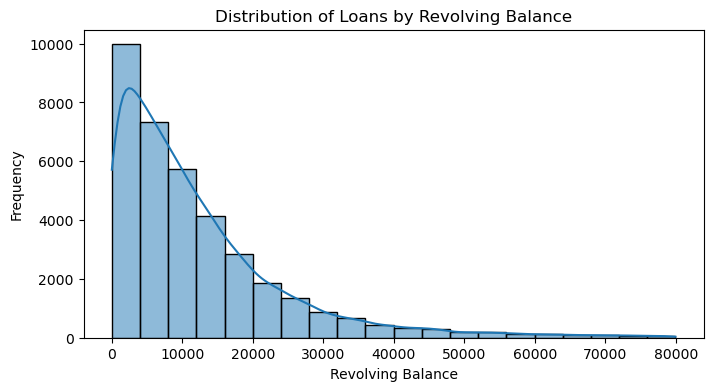

count    36801.000000
mean     12241.265971
std      12451.162291
min          0.000000
25%       3629.000000
50%       8681.000000
75%      16491.000000
max      79947.000000
Name: revol_bal, dtype: float64

In [182]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.revol_bal,kde=True,bins=20)
plt.xlabel("Revolving Balance")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Revolving Balance")
plt.show()

loan.revol_bal.describe()

# Observation: The data is left-skewed with most data points concentrated towards the left.

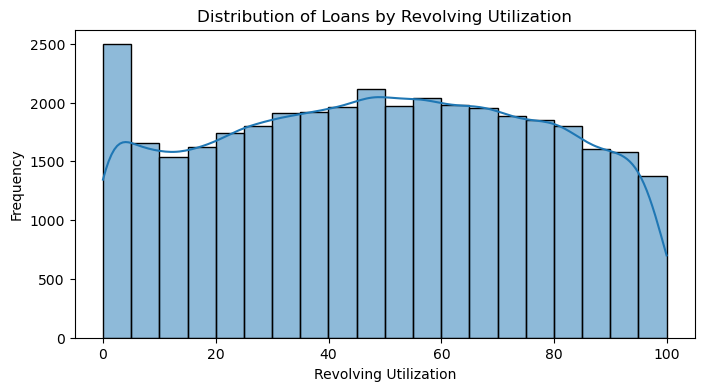

count    36801.000000
mean        48.767308
std         28.290471
min          0.000000
25%         25.400000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

In [183]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.revol_util,kde=True,bins=20)
plt.xlabel("Revolving Utilization")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Revolving Utilization")
plt.show()

loan.revol_util.describe()

#Observation : None evenly spread values

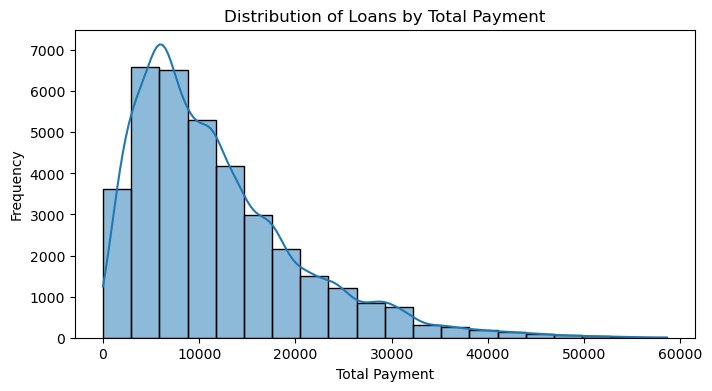

count    36801.000000
mean     11797.270228
std       8659.063219
min          0.000000
25%       5536.860000
50%       9681.009481
75%      16002.498730
max      58563.679930
Name: total_pymnt, dtype: float64

In [184]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.total_pymnt,kde=True,bins=20)
plt.xlabel("Total Payment")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Total Payment")
plt.show()

loan.total_pymnt.describe()

#Observation: peak of total payments is <10000

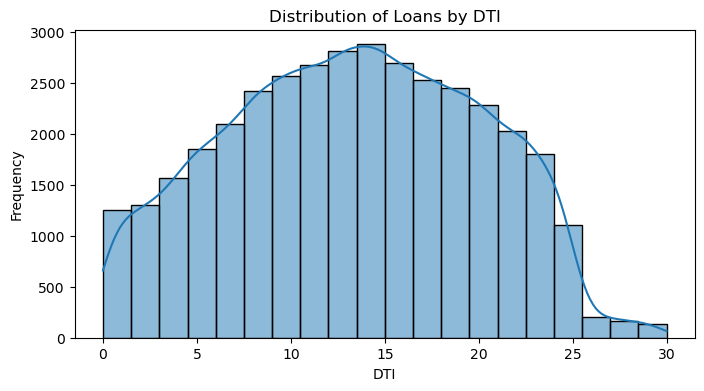

count    36801.000000
mean        13.322742
std          6.648860
min          0.000000
25%          8.210000
50%         13.420000
75%         18.580000
max         29.990000
Name: dti, dtype: float64

In [185]:
plt.figure(figsize=(8,4))
sns.histplot(x=loan.dti,kde=True,bins=20)
plt.xlabel("DTI")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by DTI")
plt.show()

loan.dti.describe()

#Observation: None

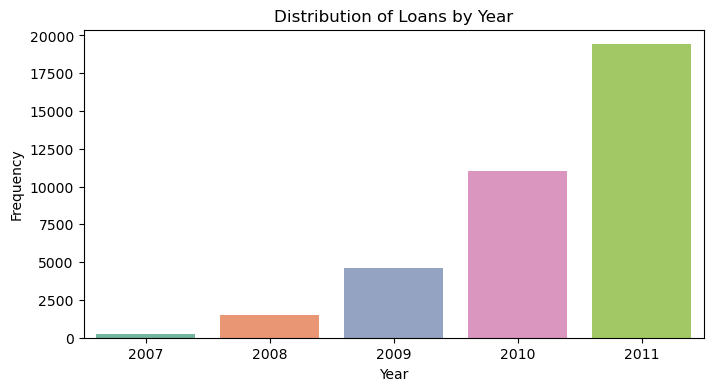

In [186]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.Issue_Year,palette='Set2')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Year")
plt.show()

#Observation : Number loans have increased year on year

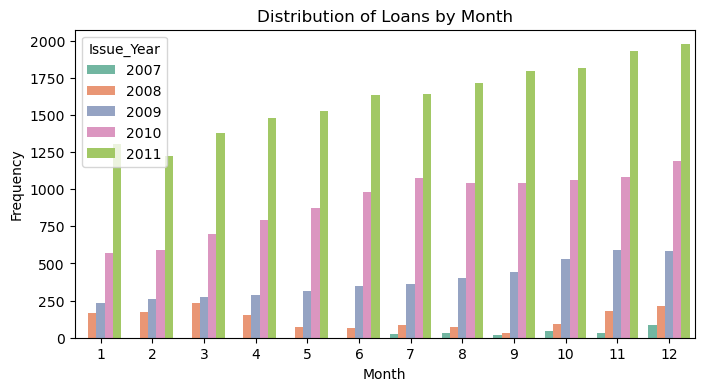

In [187]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.Issue_Month,hue=loan.Issue_Year,palette='Set2')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Distribution of Loans by Month")
plt.show()
#Observation: The number of loans increases month-over-month, with the exception of the year 2007. For 2010, there is a slight dip after July.

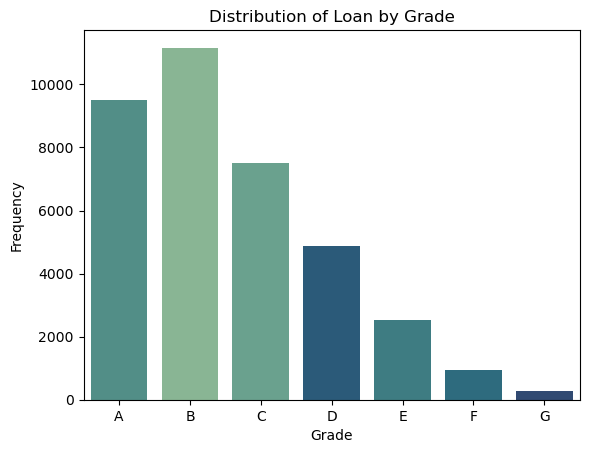

In [188]:
sns.countplot(x=loan.grade,hue=loan.grade,order=['A','B','C','D','E','F','G'],palette='crest')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("Distribution of Loan by Grade")
plt.show()

# Observation:  A large amount of loans are with grade 'A' and 'B' 

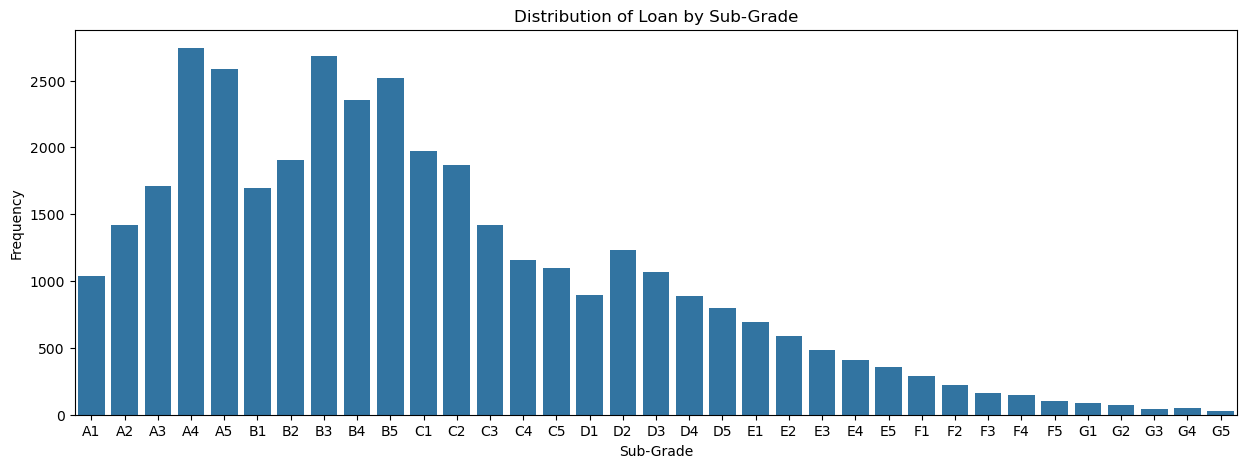

In [189]:
plt.figure(figsize=(15,5))
sns.countplot(x=sorted(loan.sub_grade))
plt.xlabel("Sub-Grade")
plt.ylabel("Frequency")
plt.title("Distribution of Loan by Sub-Grade")
plt.show()

#Observation : A large amount of loans are with sub grades under grade 'A' and 'B' commpared to rest

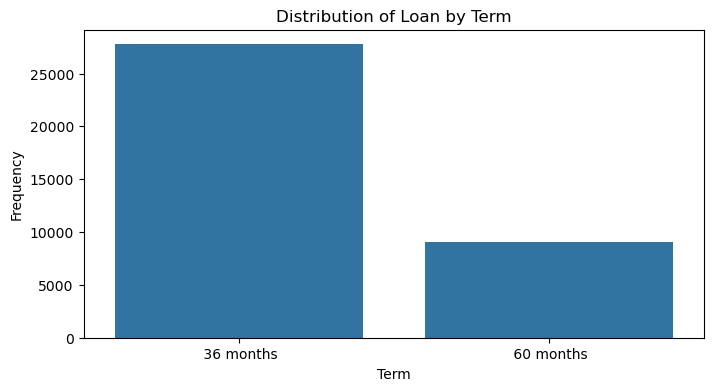

In [190]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.term)
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("Distribution of Loan by Term")
plt.show()

#Obseravtion: Majority of loan are taken for 36 months

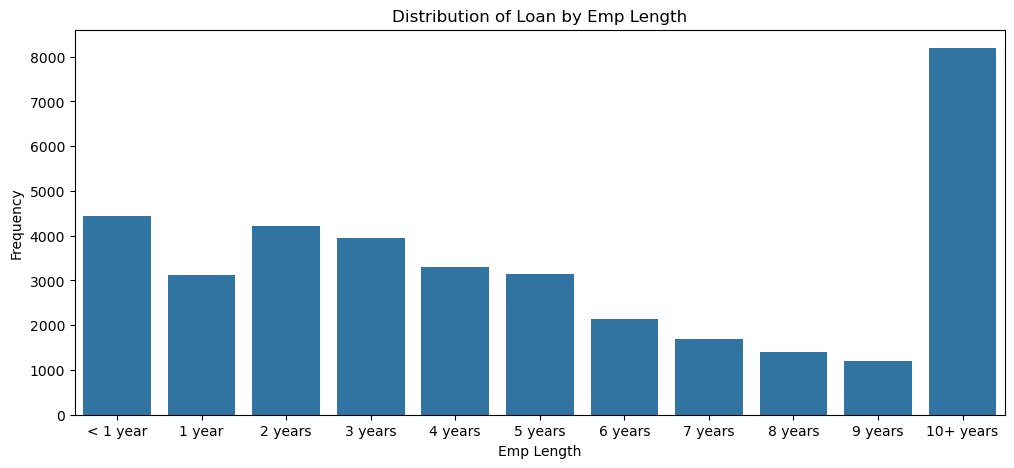

In [191]:
plt.figure(figsize=(12,5))
sns.countplot(x=loan.emp_length,order=['< 1 year', '1 year','2 years', '3 years','4 years', '5 years', '6 years','7 years',
                                       '8 years', '9 years','10+ years'])
plt.xlabel("Emp Length")
plt.ylabel("Frequency")
plt.title("Distribution of Loan by Emp Length")
plt.show()

#Observation: Employee with lenght of 10+years have more loans

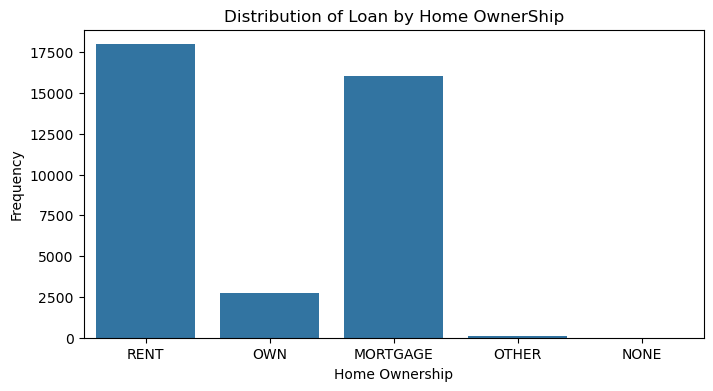

In [192]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.home_ownership)
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.title("Distribution of Loan by Home OwnerShip")
plt.show()

#Observation: The majority of borrowers do not possess any property.

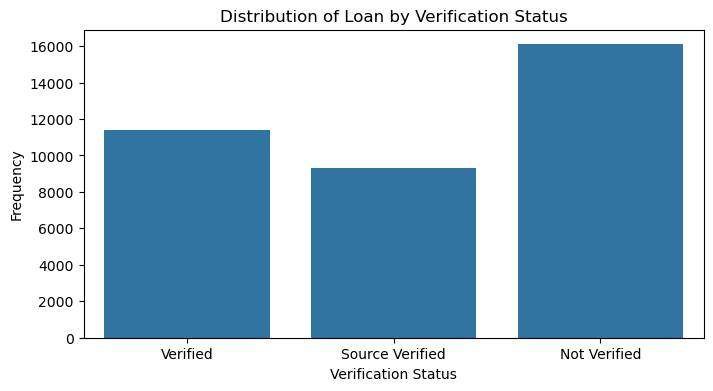

In [193]:
plt.figure(figsize=(8,4))
sns.countplot(x=loan.verification_status)
plt.xlabel("Verification Status")
plt.ylabel("Frequency")
plt.title("Distribution of Loan by Verification Status")
plt.show()

#Observation: The majority of loans are verified either by the company or the source.

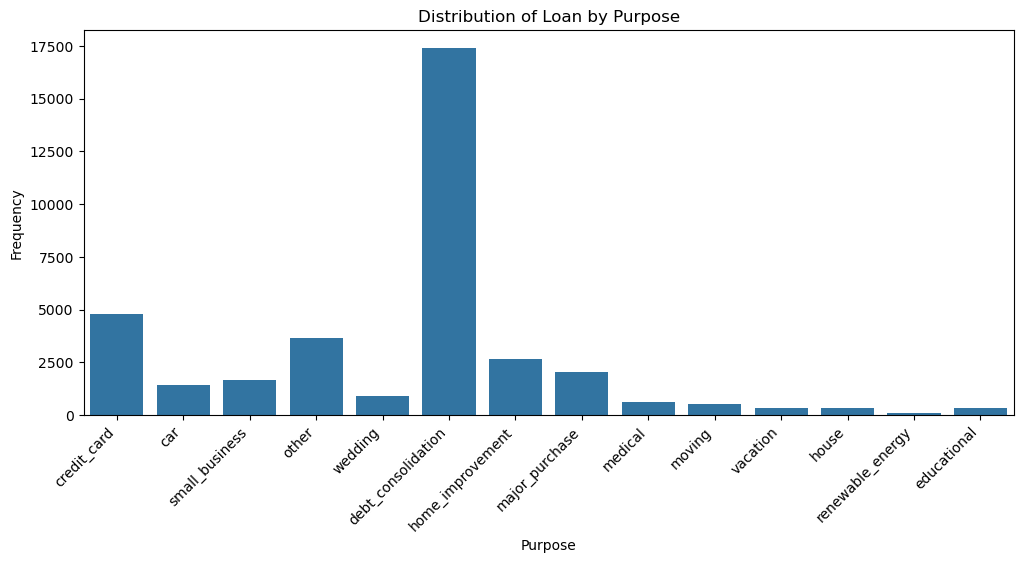

In [194]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=loan.purpose)
plt.xlabel("Purpose")
plt.ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Distribution of Loan by Purpose")
plt.show()

#Observation: Top reason for loan are debt consolidation and credit card

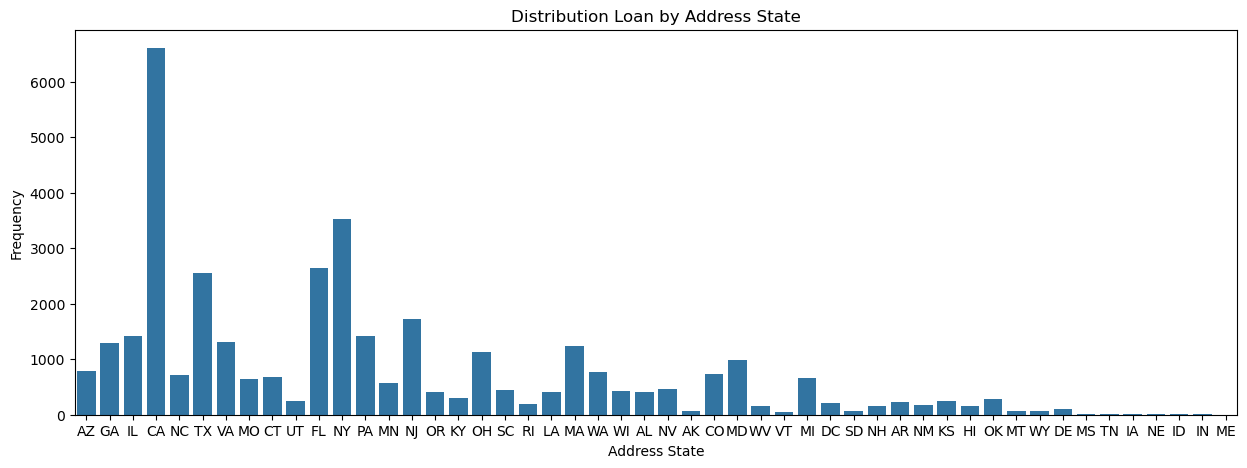

In [195]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=loan.addr_state)
plt.xlabel("Address State")
plt.ylabel("Frequency")
plt.title("Distribution Loan by Address State")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

#Observation: People in large cities tend to have more loans.

### Univariate Analysis Summary
- The majority of loans are fully repaid.
- Most loans fall within the 5,000-15,000 range.
- Interest rates typically range between 5-7.5% and 10-15%.
- Individuals with lower incomes tend to have more loans.
- Loans are generally granted to individuals with no public record incidents.
- The number of loans has increased year over year.
- There has been a month-over-month increase in loans, with exceptions in 2007 and a slight dip in 2010.
- A large number of loans are taken out by individuals in grades A and B.
- A short loan tenure of 36 months is preferred.
- Employees with over 10 years of experience tend to have more loans.
- Most borrowers do not own a home.
- People residing in larger cities tend to have more loans.

## Step 6 -  Bivariate Analysis

In [218]:
loan['int_rate_groups']  = pd.cut(loan.int_rate, bins=6,precision =0,labels=['5%-7.5%','7.5%-10%','10%-12.5%','12.5%-15%','15%-20%','20%-25%'])
loan['annual_inc_groups'] = pd.cut(loan.annual_inc, bins=6,precision =0,labels =['3k-30k','30k-45k','45k-70k','70k-100k','100k-120k','120k-140k'])
loan['loan_amnt_groups'] = pd.cut(loan.loan_amnt, bins=8,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k','35k-40k'])

In [219]:
cont_cols

['annual_inc',
 'dti',
 'installment',
 'int_rate',
 'Issue_Month',
 'Issue_Year',
 'loan_amnt',
 'pub_rec',
 'pub_rec_bankruptcies',
 'revol_bal',
 'revol_util',
 'total_pymnt']

In [220]:
cat_cols

['addr_state',
 'emp_length',
 'grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [221]:
# Checking Distribution of Annual Income Group and Loan status

# Creating pivot to get count and Total
annual_inc_pivot =  pd.pivot_table(data=loan,index="annual_inc_groups",values='id',columns="loan_status",aggfunc='count')
annual_inc_total = loan.groupby('annual_inc_groups').size().reset_index(name='Total')
annual_inc = pd.merge(annual_inc_pivot, annual_inc_total, on='annual_inc_groups', how='left')

# Creating Derived columns for % of Grand Total
annual_inc['Charged Off%'] = round((annual_inc['Charged Off']/annual_inc['Total'])*100,2)
annual_inc['Fully Paid%'] = round((annual_inc['Fully Paid']/annual_inc['Total'])*100,2)

# Reset Index
annual_inc.set_index('annual_inc_groups', inplace=True)
annual_inc

#Observation: Income group of 30-45K has more loans, Income group of 3-30K had more % of defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
annual_inc_groups,,,,,
3k-30k,1785,8459,10244,17.42,82.58
30k-45k,2521,15033,17554,14.36,85.64
45k-70k,672,5330,6002,11.20,88.80
70k-100k,240,1920,2160,11.11,88.89
100k-120k,66,504,570,11.58,88.42
120k-140k,28,243,271,10.33,89.67


<Figure size 1500x700 with 0 Axes>

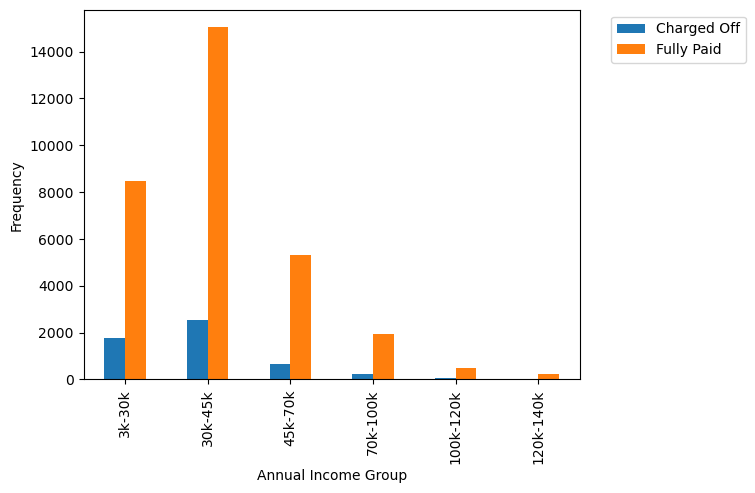

In [222]:
# Visualizing Distribution of Annual Income Group and Loan Status by Count
plt.figure(figsize=(15,7))
annual_inc[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Annual Income Group")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

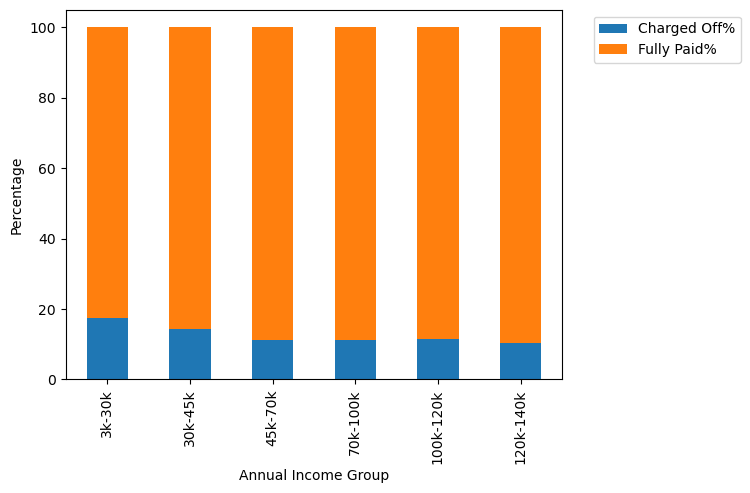

In [223]:
#Visualizing Distribution of Annual Income Group and Loan Status by Percentage
plt.figure(figsize=(15,7))
annual_inc[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Annual Income Group")
plt.ylabel("Percentage")
plt.show()

In [224]:
# Checking Distribution of Loan Amount Group and Loan status

# Creating pivot to get count and Total
loan_amount_pivot =  pd.pivot_table(data=loan,index="loan_amnt_groups",values='id',columns="loan_status",aggfunc='count')
loan_amount_total = loan.groupby('loan_amnt_groups').size().reset_index(name='Total')
loan_amount = pd.merge(loan_amount_pivot, loan_amount_total, on='loan_amnt_groups', how='left')

# Creating Derived columns for % of Grand Total
loan_amount['Charged Off%'] = round((loan_amount['Charged Off']/loan_amount['Total'])*100,2)
loan_amount['Fully Paid%'] = round((loan_amount['Fully Paid']/loan_amount['Total'])*100,2)

# Reset Index
loan_amount.set_index('loan_amnt_groups', inplace=True)
loan_amount

#Observation: More loans are given for amount 5K-10K, Loan Amount group of 25-35K had more % of defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
loan_amnt_groups,,,,,
0-5k,930,6046,6976,13.33,86.67
5k-10k,1380,9438,10818,12.76,87.24
10k-15k,1030,6827,7857,13.11,86.89
15k-20k,735,3966,4701,15.63,84.37
20k-25k,549,2574,3123,17.58,82.42
25k-30k,411,1719,2130,19.30,80.70
30k-35k,111,454,565,19.65,80.35
35k-40k,166,465,631,26.31,73.69


<Figure size 1500x700 with 0 Axes>

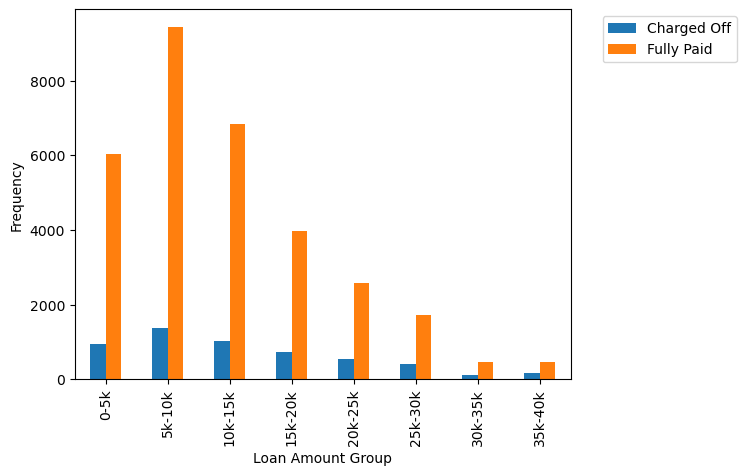

In [225]:
# Visualizing Distribution of Loan Group and Loan Status by Count
plt.figure(figsize=(15,7))
loan_amount[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Loan Amount Group")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

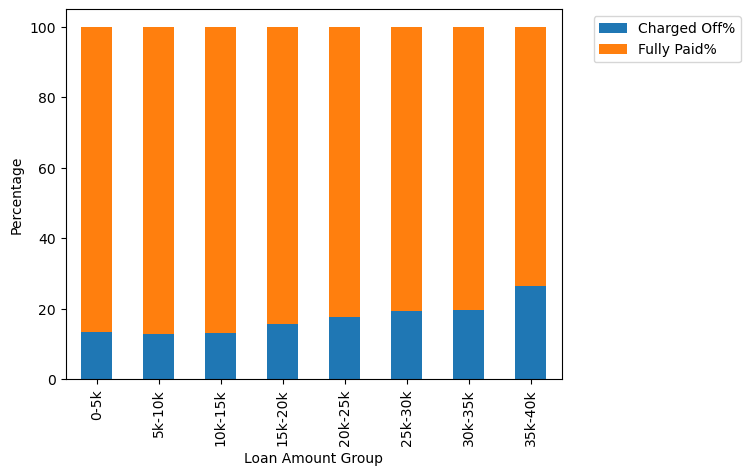

In [226]:
#Visualizing Distribution of Loan Amount Group and Loan Status by Percentage
plt.figure(figsize=(15,7))
loan_amount[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Loan Amount Group")
plt.ylabel("Percentage")
plt.show()

In [227]:
# Checking Distribution of Interest Rate Group and Loan status

# Creating pivot to get count and Total
int_rate_pivot =  pd.pivot_table(data=loan,index="int_rate_groups",values='id',columns="loan_status",aggfunc='count')
int_rate_total = loan.groupby('int_rate_groups').size().reset_index(name='Total')
int_rate = pd.merge(int_rate_pivot, int_rate_total, on='int_rate_groups', how='left')

# Creating Derived columns for % of Grand Total
int_rate['Charged Off%'] = round((int_rate['Charged Off']/int_rate['Total'])*100,2)
int_rate['Fully Paid%'] = round((int_rate['Fully Paid']/int_rate['Total'])*100,2)

# Reset Index
int_rate.set_index('int_rate_groups', inplace=True)
int_rate

#Observation: More loans are given for interest rate bucket 7.5-12.5,% of defaulters increases with int rate 

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
int_rate_groups,,,,,
5%-7.5%,445,7786,8231,5.41,94.59
7.5%-10%,1135,8973,10108,11.23,88.77
10%-12.5%,1666,8804,10470,15.91,84.09
12.5%-15%,1358,4523,5881,23.09,76.91
15%-20%,573,1238,1811,31.64,68.36
20%-25%,135,165,300,45.00,55.00


<Figure size 1500x700 with 0 Axes>

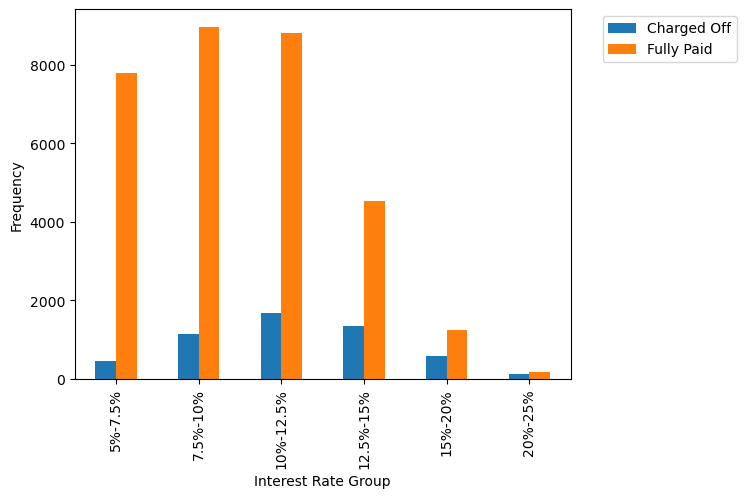

In [228]:
# Visualizing Distribution of Int Rate Group and Loan Status by Count
plt.figure(figsize=(15,7))
int_rate[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Interest Rate Group")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

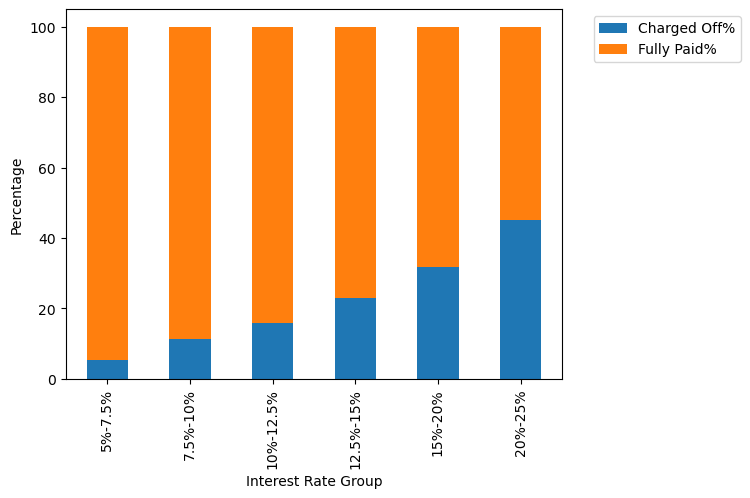

In [229]:
#Visualizing Distribution of Int Rate Group and Loan Status by Percentage
plt.figure(figsize=(15,7))
int_rate[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Interest Rate Group")
plt.ylabel("Percentage")
plt.show()

In [230]:
# Checking Distribution of Term and Loan status

# Creating pivot to get count and Total
term_pivot =  pd.pivot_table(data=loan,index="term",values='id',columns="loan_status",aggfunc='count')
term_total = loan.groupby('term').size().reset_index(name='Total')
term = pd.merge(term_pivot, term_total, on='term', how='left')

# Creating Derived columns for % of Grand Total
term['Charged Off%'] = round((term['Charged Off']/term['Total'])*100,2)
term['Fully Paid%'] = round((term['Fully Paid']/term['Total'])*100,2)

# Reset Index
term.set_index('term', inplace=True)
term

#Observation: loan term of 60 months has more defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
term,,,,,
36 months,3021,24738,27759,10.88,89.12
60 months,2291,6751,9042,25.34,74.66


<Figure size 1500x700 with 0 Axes>

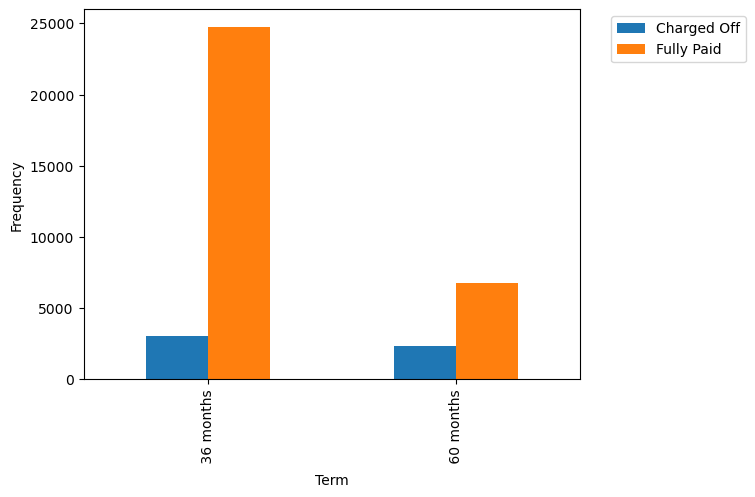

In [231]:
# Visualizing Distribution of Term and Loan Status by Count
plt.figure(figsize=(15,7))
term[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

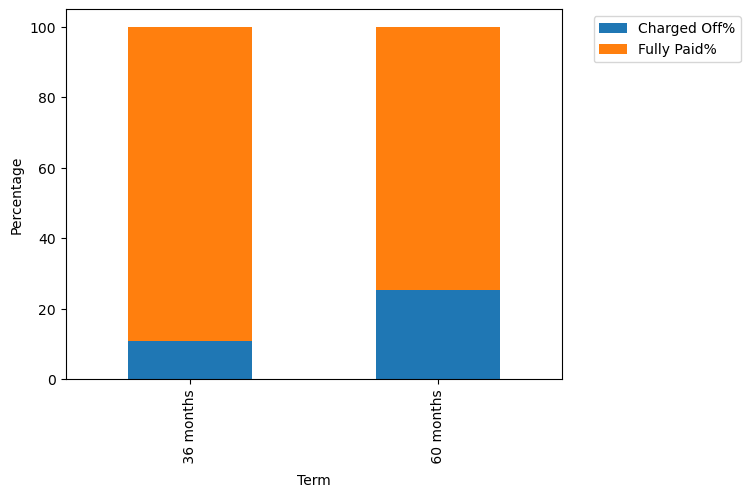

In [232]:
#Visualizing Distribution of Term and Loan Status by Percentage
plt.figure(figsize=(15,7))
term[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Term")
plt.ylabel("Percentage")
plt.show()

In [233]:
# Checking Distribution of grade and Loan status

# Creating pivot to get count and Total
grade_pivot =  pd.pivot_table(data=loan,index="grade",values='id',columns="loan_status",aggfunc='count')
grade_total = loan.groupby('grade').size().reset_index(name='Total')
grade = pd.merge(grade_pivot, grade_total, on='grade', how='left')

# Creating Derived columns for % of Grand Total
grade['Charged Off%'] = round((grade['Charged Off']/grade['Total'])*100,2)
grade['Fully Paid%'] = round((grade['Fully Paid']/grade['Total'])*100,2)

# Reset Index
grade.set_index('grade', inplace=True)
grade

#Observation: Grade B had more number on loan followed by A, where as grade G has more % of defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
grade,,,,,
A,551,8947,9498,5.80,94.20
B,1333,9830,11163,11.94,88.06
C,1270,6249,7519,16.89,83.11
D,1072,3803,4875,21.99,78.01
E,686,1853,2539,27.02,72.98
F,305,622,927,32.90,67.10
G,95,185,280,33.93,66.07


<Figure size 1500x700 with 0 Axes>

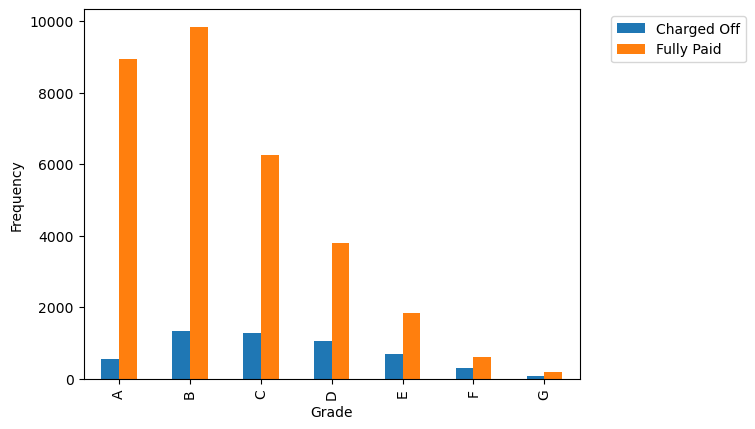

In [234]:
# Visualizing Distribution of Grade and Loan Status by Count
plt.figure(figsize=(15,7))
grade[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

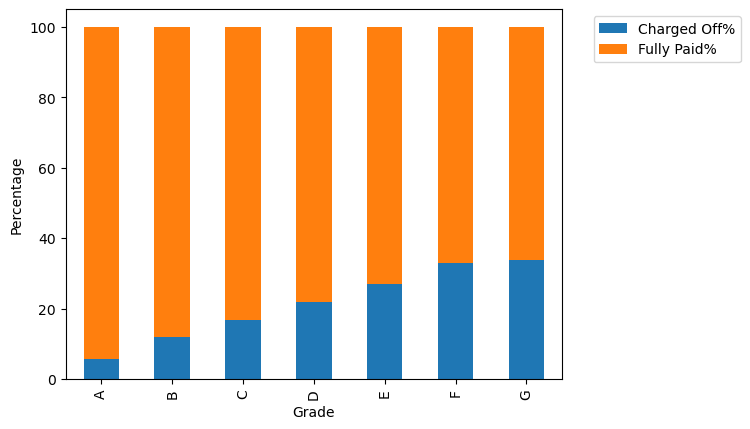

In [235]:
#Visualizing Distribution of Grade and Loan Status by Percentage
plt.figure(figsize=(15,7))
grade[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.show()

In [236]:
# Checking Distribution of Sub grade and Loan status

# Creating pivot to get count and Total
sub_grade_pivot =  pd.pivot_table(data=loan,index="sub_grade",values='id',columns="loan_status",aggfunc='count')
sub_grade_total = loan.groupby('sub_grade').size().reset_index(name='Total')
sub_grade = pd.merge(sub_grade_pivot, sub_grade_total, on='sub_grade', how='left')

# Creating Derived columns for % of Grand Total
sub_grade['Charged Off%'] = round((sub_grade['Charged Off']/sub_grade['Total'])*100,2)
sub_grade['Fully Paid%'] = round((sub_grade['Fully Paid']/sub_grade['Total'])*100,2)

# Reset Index
sub_grade.set_index('sub_grade', inplace=True)
sub_grade

#Observation: Sub Grade for G has more % of defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
sub_grade,,,,,
A1,24,1013,1037,2.31,97.69
A2,68,1351,1419,4.79,95.21
A3,87,1624,1711,5.08,94.92
A4,167,2576,2743,6.09,93.91
A5,205,2383,2588,7.92,92.08
B1,151,1548,1699,8.89,91.11
B2,206,1698,1904,10.82,89.18
B3,320,2366,2686,11.91,88.09
B4,311,2042,2353,13.22,86.78


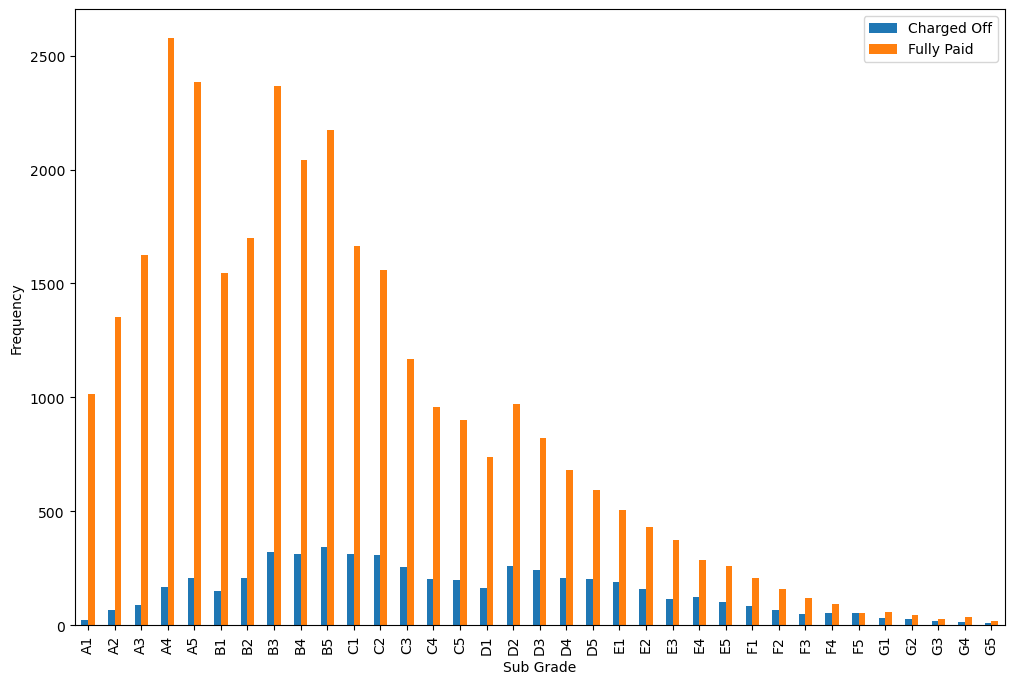

In [237]:
# Visualizing Distribution of Sub Grade and Loan Status by Count
#plt.figure(figsize=(15,8))
sub_grade[['Charged Off','Fully Paid']].plot(kind='bar',figsize=(12,8))
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Sub Grade")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

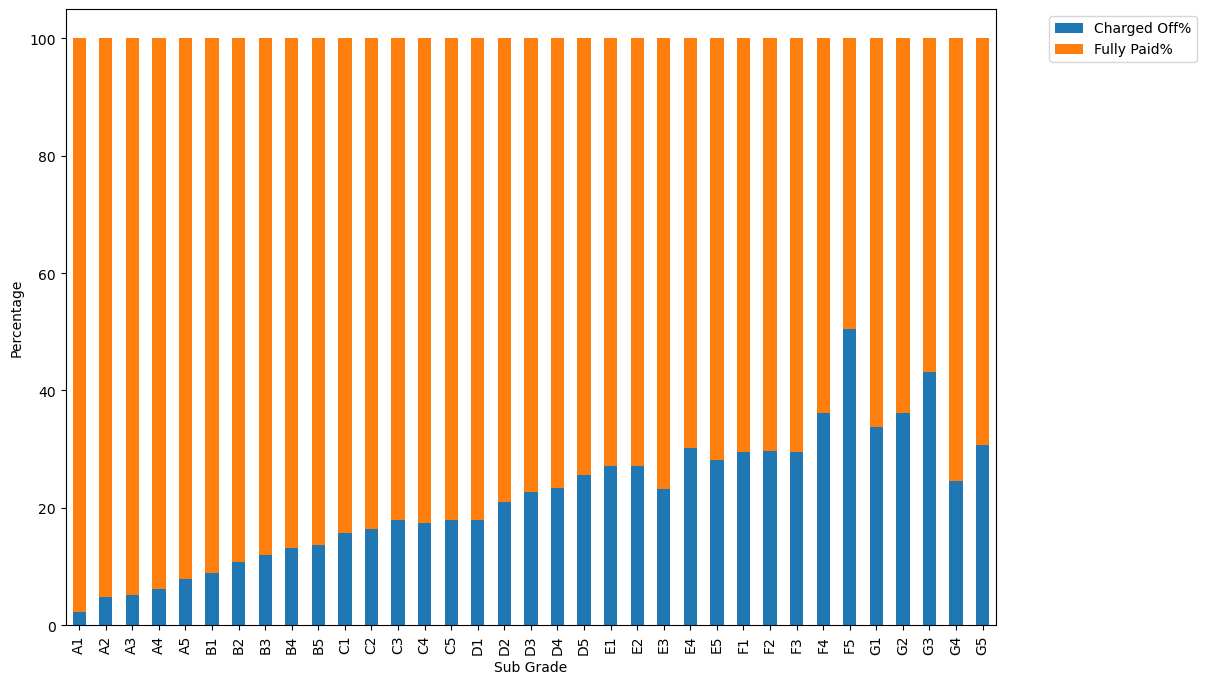

In [238]:
#Visualizing Distribution of Sub Grade and Loan Status by Percentage
plt.figure(figsize=(15,7))
sub_grade[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True,figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Sub Grade")
plt.ylabel("Percentage")
plt.show()

In [239]:
loan.home_ownership.value_counts()

home_ownership
RENT        17975
MORTGAGE    16011
OWN          2716
OTHER          96
NONE            3
Name: count, dtype: int64

In [240]:
loan=loan[~(loan['home_ownership']=='NONE')]

In [241]:
# Checking Distribution of Home OwnerShip and Loan status

# Creating pivot to get count and Total
home_ownership_pivot =  pd.pivot_table(data=loan,index="home_ownership",values='id',columns="loan_status",aggfunc='count')
home_ownership_total = loan.groupby('home_ownership').size().reset_index(name='Total')
home_ownership = pd.merge(home_ownership_pivot, home_ownership_total, on='home_ownership', how='left')

# Creating Derived columns for % of Grand Total
home_ownership['Charged Off%'] = round((home_ownership['Charged Off']/home_ownership['Total'])*100,2)
home_ownership['Fully Paid%'] = round((home_ownership['Fully Paid']/home_ownership['Total'])*100,2)

# Reset Index
home_ownership.set_index('home_ownership', inplace=True)
home_ownership

#Observation: People who own property apply for less loans and people with no property has more loan defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
home_ownership,,,,,
MORTGAGE,2185,13826,16011,13.65,86.35
OTHER,18,78,96,18.75,81.25
OWN,390,2326,2716,14.36,85.64
RENT,2719,15256,17975,15.13,84.87


<Figure size 1500x700 with 0 Axes>

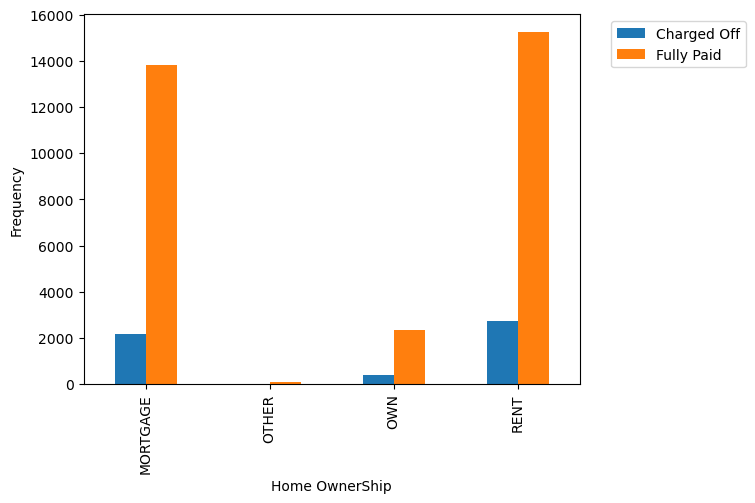

In [242]:
# Visualizing Distribution of Home Ownership and Loan Status by Count
plt.figure(figsize=(15,7))
home_ownership[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Home OwnerShip")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

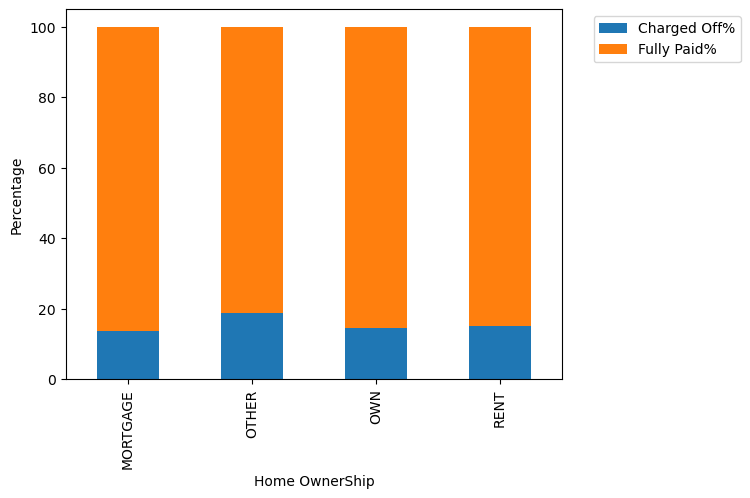

In [243]:
#Visualizing Distribution of Home OwnerShip and Loan Status by Percentage
plt.figure(figsize=(15,7))
home_ownership[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Home OwnerShip")
plt.ylabel("Percentage")
plt.show()

In [244]:
# Checking Distribution of Employee Length and Loan status

# Creating pivot to get count and Total
emp_length_pivot =  pd.pivot_table(data=loan,index="emp_length",values='id',columns="loan_status",aggfunc='count')
emp_length_total = loan.groupby('emp_length').size().reset_index(name='Total')
emp_length = pd.merge(emp_length_pivot, emp_length_total, on='emp_length', how='left')

# Creating Derived columns for % of Grand Total
emp_length['Charged Off%'] = round((emp_length['Charged Off']/emp_length['Total'])*100,2)
emp_length['Fully Paid%'] = round((emp_length['Fully Paid']/emp_length['Total'])*100,2)

# Reset Index
emp_length.set_index('emp_length', inplace=True)
emp_length

#Observation: Employee with 10+ years experience has more loan and more % of defaulters

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
emp_length,,,,,
1 year,454,2672,3126,14.52,85.48
10+ years,1297,6896,8193,15.83,84.17
2 years,559,3653,4212,13.27,86.73
3 years,550,3406,3956,13.90,86.10
4 years,453,2845,3298,13.74,86.26
5 years,452,2690,3142,14.39,85.61
6 years,302,1833,2135,14.15,85.85
7 years,260,1421,1681,15.47,84.53
8 years,203,1201,1404,14.46,85.54


<Figure size 1500x700 with 0 Axes>

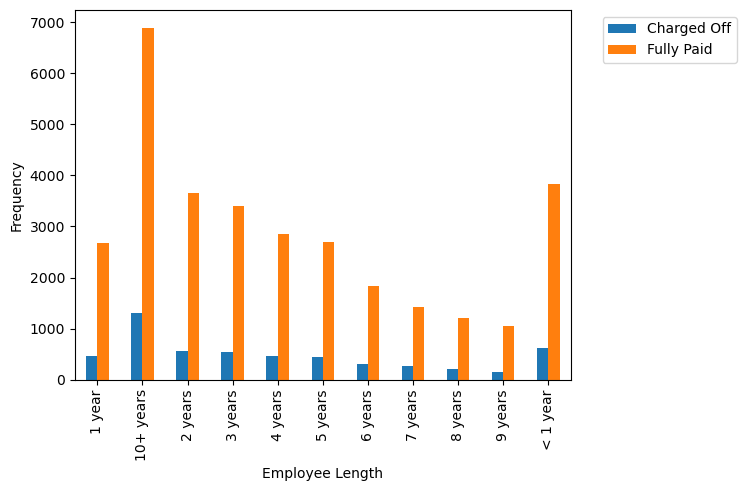

In [245]:
# Visualizing Distribution of Home Ownership and Loan Status by Count
plt.figure(figsize=(15,7))
emp_length[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Employee Length")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

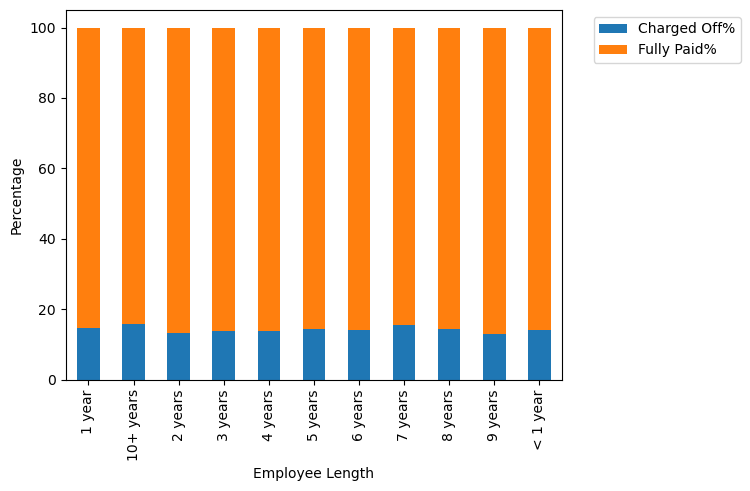

In [246]:
#Visualizing Distribution of Home OwnerShip and Loan Status by Percentage
plt.figure(figsize=(15,7))
emp_length[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Employee Length")
plt.ylabel("Percentage")
plt.show()

In [314]:
# Checking Distribution of Address State and Loan status

# Creating pivot to get count and Total
addr_state_pivot =  pd.pivot_table(data=loan,index="addr_state",values='id',columns="loan_status",aggfunc='count',fill_value=0)
addr_state_total = loan.groupby('addr_state').size().reset_index(name='Total')
addr_state = pd.merge(addr_state_pivot, addr_state_total, on='addr_state', how='left')

# Creating Derived columns for % of Grand Total
addr_state['Charged Off%'] = round((addr_state['Charged Off']/addr_state['Total'])*100,2)
addr_state['Fully Paid%'] = round((addr_state['Fully Paid']/addr_state['Total'])*100,2)

# Reset Index
addr_state.set_index('addr_state', inplace=True)
addr_state

#Observation: Majority of laon are taken by people in big cities 

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
addr_state,,,,,
AK,14,60,74,18.92,81.08
AL,51,362,413,12.35,87.65
AR,26,201,227,11.45,88.55
AZ,111,676,787,14.10,85.90
CA,1053,5554,6607,15.94,84.06
CO,90,639,729,12.35,87.65
CT,88,591,679,12.96,87.04
DC,15,195,210,7.14,92.86
DE,12,98,110,10.91,89.09


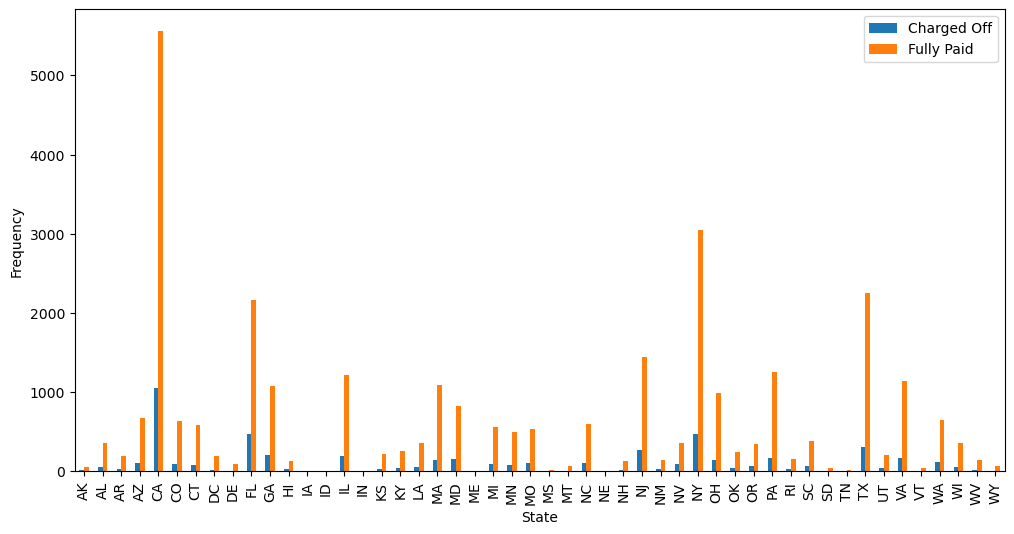

In [316]:
# Visualizing Distribution of Address State and Loan Status by Count
#plt.figure(figsize=(15,5))
addr_state[['Charged Off','Fully Paid']].plot(kind='bar', figsize=(12, 6))
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

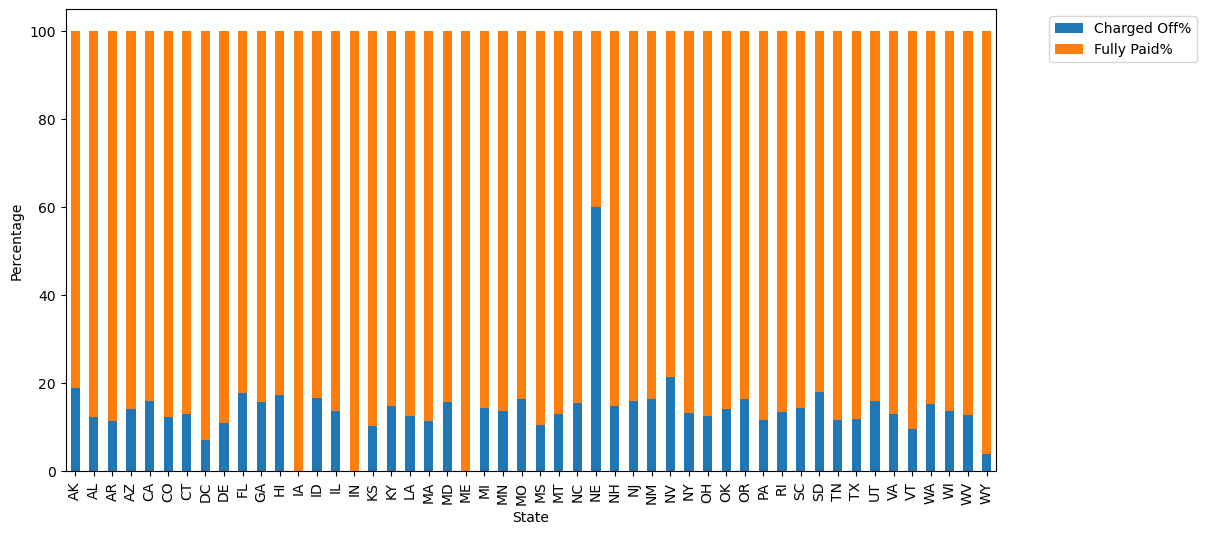

In [318]:
# Visualizing Distribution of address State and Loan Status by Count
addr_state[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True,figsize=(12, 6))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("State")
plt.ylabel("Percentage")
plt.show()

In [250]:
# Checking Distribution of Purpose and Loan status

# Creating pivot to get count and Total
purpose_pivot =  pd.pivot_table(data=loan,index="purpose",values='id',columns="loan_status",aggfunc='count')
purpose_total = loan.groupby('purpose').size().reset_index(name='Total')
purpose = pd.merge(purpose_pivot, purpose_total, on='purpose', how='left')

# Creating Derived columns for % of Grand Total
purpose['Charged Off%'] = round((purpose['Charged Off']/purpose['Total'])*100,2)
purpose['Fully Paid%'] = round((purpose['Fully Paid']/purpose['Total'])*100,2)

# Reset Index
purpose.set_index('purpose', inplace=True)
purpose

#Observation : Majority of loans are taken for debt consolidation, where as loan taken for small buisness,Home and education has higher default %

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
purpose,,,,,
car,154,1274,1428,10.78,89.22
credit_card,500,4301,4801,10.41,89.59
debt_consolidation,2645,14731,17376,15.22,84.78
educational,52,262,314,16.56,83.44
home_improvement,316,2351,2667,11.85,88.15
house,58,286,344,16.86,83.14
major_purchase,209,1834,2043,10.23,89.77
medical,100,541,641,15.60,84.40
moving,83,462,545,15.23,84.77


<Figure size 1500x700 with 0 Axes>

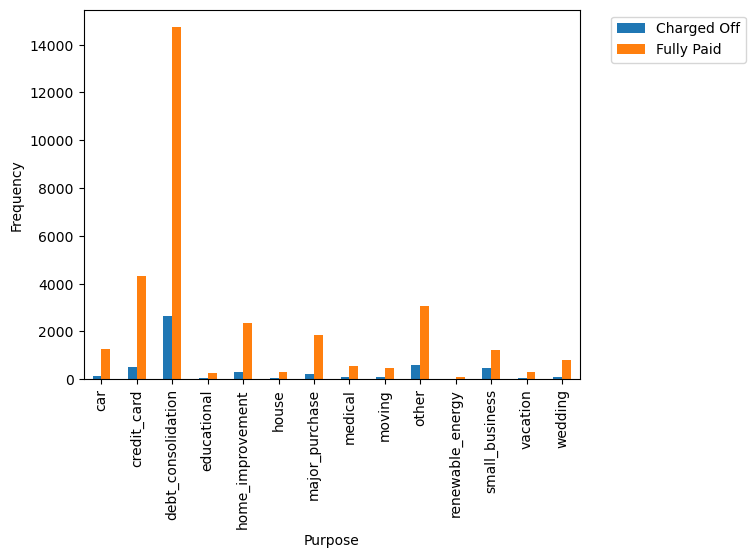

In [251]:
# Visualizing Distribution of Purpose and Loan Status by Count
plt.figure(figsize=(15,7))
purpose[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Purpose")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

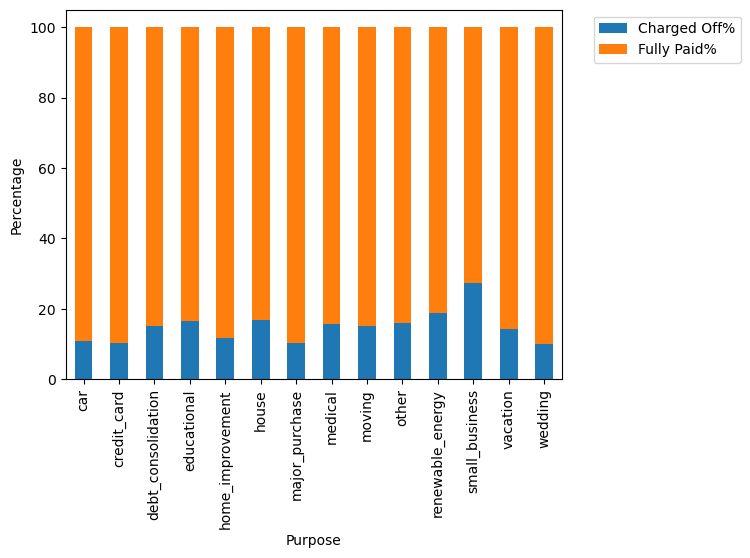

In [252]:
#Visualizing Distribution of Purpose and Loan Status by Percentage
plt.figure(figsize=(15,7))
purpose[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Purpose")
plt.ylabel("Percentage")
plt.show()

In [253]:
# Checking Distribution of Verification Status and Loan status

# Creating pivot to get count and Total
verification_status_pivot =  pd.pivot_table(data=loan,index="verification_status",values='id',columns="loan_status",aggfunc='count')
verification_status_total = loan.groupby('verification_status').size().reset_index(name='Total')
verification_status = pd.merge(verification_status_pivot, verification_status_total, on='verification_status', how='left')


# Creating Derived columns for % of Grand Total
verification_status['Charged Off%'] = round((verification_status['Charged Off']/verification_status['Total'])*100,2)
verification_status['Fully Paid%'] = round((verification_status['Fully Paid']/verification_status['Total'])*100,2)

# Reset Index
verification_status.set_index('verification_status', inplace=True)
verification_status


,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
verification_status,,,,,
Not Verified,2022,14071,16093,12.56,87.44
Source Verified,1376,7933,9309,14.78,85.22
Verified,1914,9482,11396,16.80,83.20


<Figure size 1500x700 with 0 Axes>

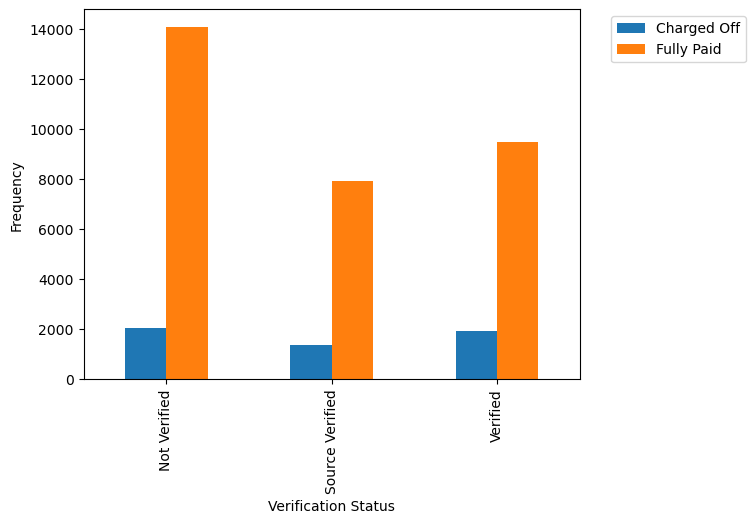

In [254]:
# Visualizing Distribution of Verification Status and Loan Status by Count
plt.figure(figsize=(15,7))
verification_status[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Verification Status")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

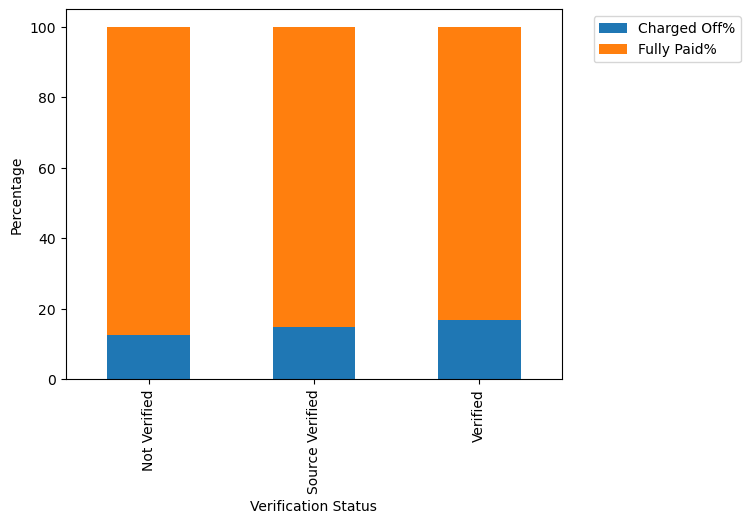

In [255]:
#Visualizing Distribution of Verification Status and Loan Status by Percentage
plt.figure(figsize=(15,7))
verification_status[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Verification Status")
plt.ylabel("Percentage")
plt.show()

In [298]:
# Checking Distribution of Verification Status and Loan status

# Creating pivot to get count and Total
Issue_Year_pivot =  pd.pivot_table(data=loan,index="Issue_Year",values='id',columns="loan_status",aggfunc='count')
Issue_Year_total = loan.groupby('Issue_Year').size().reset_index(name='Total')
Issue_Year = pd.merge(Issue_Year_pivot, Issue_Year_total, on='Issue_Year', how='left')


# Creating Derived columns for % of Grand Total
Issue_Year['Charged Off%'] = round((Issue_Year['Charged Off']/Issue_Year['Total'])*100,2)
Issue_Year['Fully Paid%'] = round((Issue_Year['Fully Paid']/Issue_Year['Total'])*100,2)

# Reset Index
Issue_Year.set_index('Issue_Year', inplace=True)
Issue_Year

,Charged Off,Fully Paid,Total,Charged Off%,Fully Paid%
Issue_Year,,,,,
2007,43,199,242,17.77,82.23
2008,240,1291,1531,15.68,84.32
2009,587,4036,4623,12.70,87.30
2010,1375,9622,10997,12.50,87.50
2011,3067,16338,19405,15.81,84.19


<Figure size 1500x700 with 0 Axes>

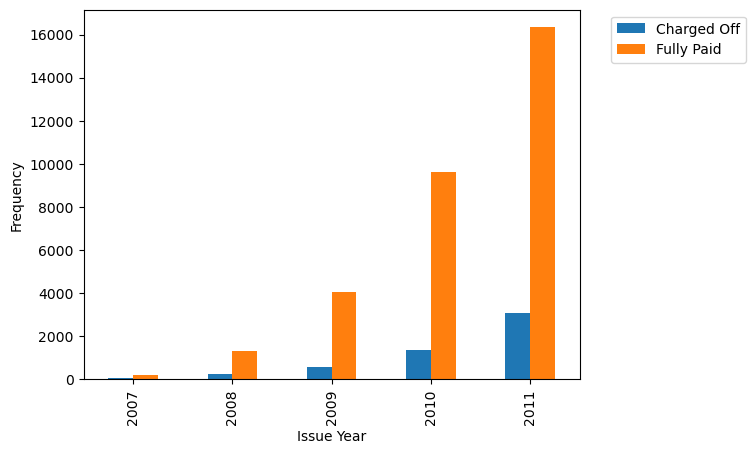

In [306]:
# Visualizing Distribution of Issue Year and Loan Status by Count

plt.figure(figsize=(15,7))
Issue_Year[['Charged Off','Fully Paid']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Issue Year")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x700 with 0 Axes>

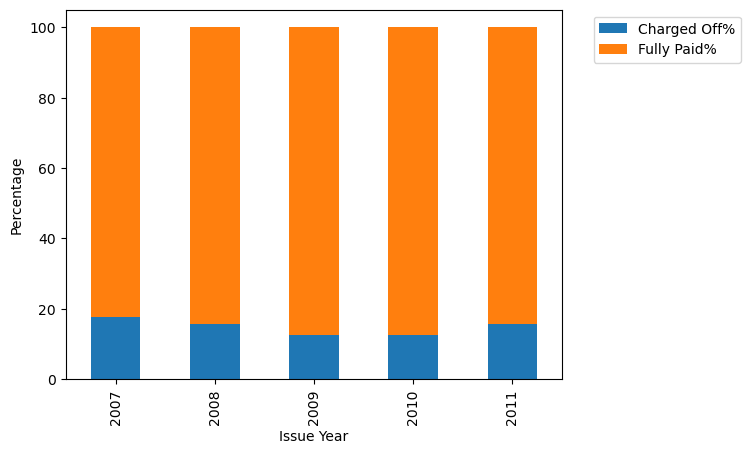

In [308]:
#Visualizing Distribution of Issue Yea and Loan Status by Percentage
plt.figure(figsize=(15,7))
Issue_Year[['Charged Off%','Fully Paid%']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Issue Year")
plt.ylabel("Percentage")
plt.show()

### Bivariate Analysis Summary
- The income group earning 30-45K has a higher number of loans, while the 3-30K income group has a higher percentage of defaults.
- Loans in the range of 5K-10K are more common, but the 25-35K loan amount group has a higher percentage of defaults.
- Loans with interest rates between 7.5-12.5% are more frequent, and the percentage of defaults increases with the interest rate.
- A loan term of 60 months is associated with a higher number of defaults.
- Grade B borrowers have a higher number of loans compared to Grade A, whereas Grade G has a higher percentage of defaults.
- The subgrade for G has a higher percentage of defaults.
- Property owners apply for fewer loans, and those without property have a higher rate of loan defaults.
- Employees with over 10 years of experience have a higher number of loans and a higher percentage of defaults.
- The majority of loans are taken out for debt consolidation, whereas loans for small business, home, and education have a higher default rate.

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' or 'Educational'
- Applicants who does not won a property
- Applicants who receive interest at the rate of 7.5-10.5%
- Applicants who have taken a loan in the range 25-35K 
- When grade is G 
- When employment length is 10yrs
- When the loan amount is above 25K
- When term of loan is 60 months